In [1]:
#import packages
import torch
import numpy as np
import torchvision
import matplotlib.pyplot as plt
import time
import types
import matplotlib as mpl

In [4]:
# import MNIST dataset
MNIST = torchvision.datasets.MNIST('./data/', train = True, download = True, transform = torchvision.transforms.ToTensor())   
s = [i[0].reshape(784) for i in MNIST]
s = torch.stack(s)

In [5]:
# load the data
eta_str = ['50', '10', '1']
w, w_list, err_list, n_list =[], [], [], []
for i in eta_str:
    a, b, c, d= torch.load('t4_11_regular='+i)
    w.append(a)
    w_list.append(np.array(b))
    n_list.append(d)
    err_list.append( np.array([i.cpu().numpy() for i in c]))

In [6]:
# figure size parameters
bsize = 25
ssize = 20
lwidth = 6
msize = 15
Bbox = mpl.transforms.Bbox([[-0.4,-0.1], [6,4.8]])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


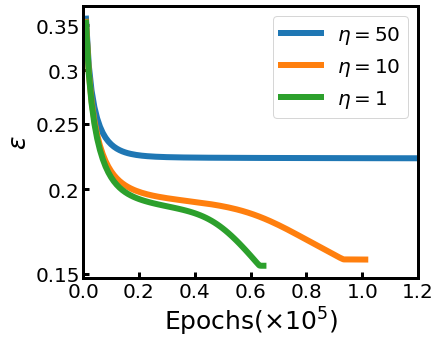

In [8]:
# Training Process
A = plt.figure(figsize = (6,5) )
axis = plt.subplot(111)
for i in range(3):
    plt.plot([j/1e5 for j in n_list[i]], (err_list[i]/((s**2).sum())*784*784*60000), label = r'$\eta=$'+eta_str[i], linewidth = lwidth)
plt.legend(fontsize = ssize)
plt.semilogy()
plt.xlabel(r'Epochs($\times 10^5$)', fontsize = bsize)

plt.ylabel(r'$\epsilon$', fontsize = bsize)

plt.yticks([0.15, 0.2, 0.25, 0.3, 0.35], [0.15, 0.20,0.25,0.30, 0.35], fontsize = ssize)
plt.tick_params(which = 'major', direction = 'in', width = 3, length = 6)
plt.tick_params(which = 'minor', direction = 'in', width = 1, length = 5)
ax = plt.gca()
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
ax.spines['top'].set_linewidth(3)
ax.ticklabel_format(style = 'sci', scilimits = (-1,2),axis= 'x')
plt.xticks(fontsize = ssize)
plt.xlim(0,1.2)
ax.get_xaxis().get_offset_text().set(va = 'center', ha = 'left')
ax.xaxis.get_offset_text().set_fontsize(ssize)
plt.savefig('fig/fig-1-1-evolution of energy of weights.eps', bbox_inches = Bbox)

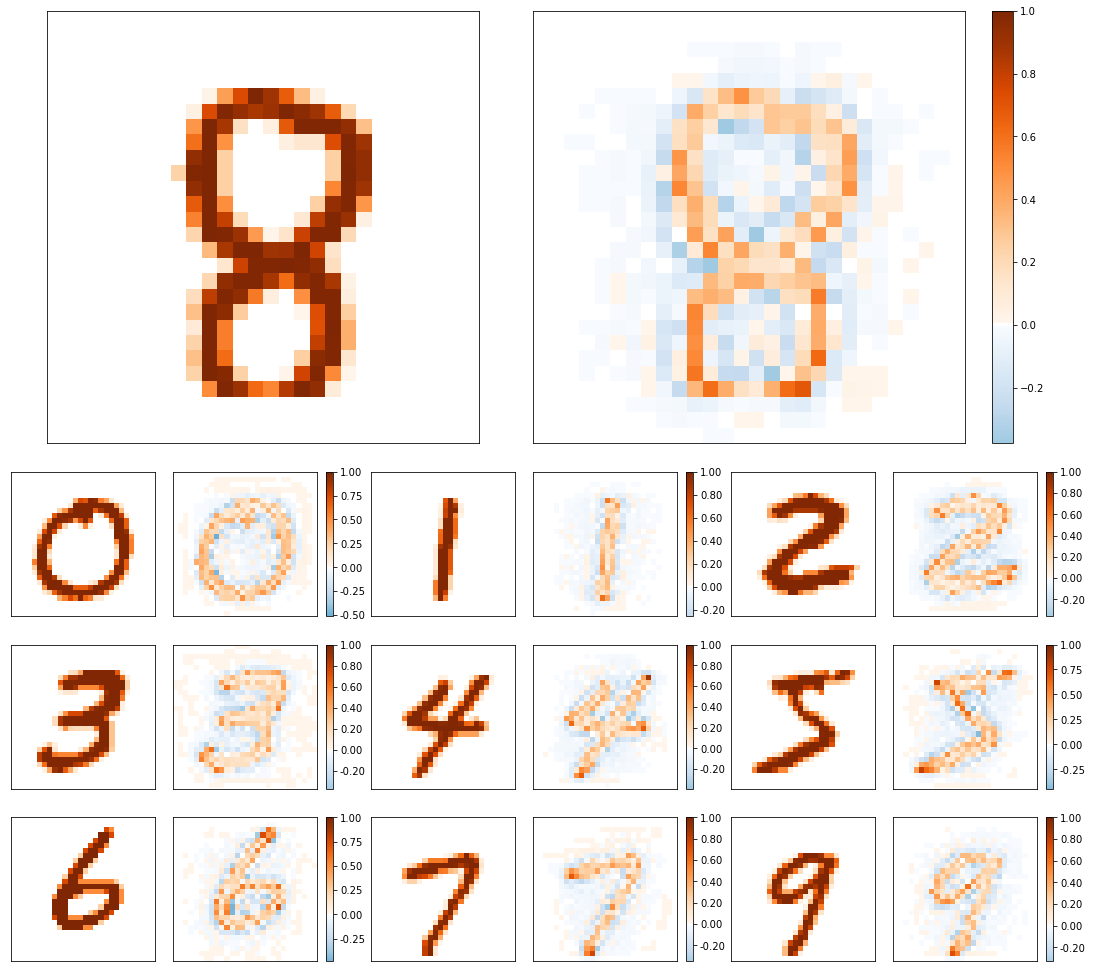

In [9]:
## representation 展示
MNIST = torchvision.datasets.MNIST('./data/', train = True, download = True, transform = torchvision.transforms.ToTensor())   
s = [i[0].reshape(784) for i in MNIST]
s = torch.stack(s)
label = torch.tensor([i[1] for i in MNIST])

A = plt.figure(figsize = (15,12))
bottom = mpl.cm.get_cmap('Oranges', 128)
top = mpl.cm.get_cmap('Blues_r', 128)
ax1 = plt.axes([0.5,0.6,0.5,0.5])

n = 2
x = torch.linalg.inv(torch.eye(784).double() + w[n].cpu()).mm(s[188].t().double().reshape(-1,1))
newcolors = np.vstack((top(np.linspace(0, 1,  128    ))[-abs(int(x.min()*128)):], np.array([1,1,1,1]),
                               bottom(np.linspace(0, 1, 128))))
newcmp = mpl.colors.ListedColormap(newcolors, name='OrangeBlue')
plt.imshow(x.reshape(28,28), cmap = newcmp, vmax = 1, vmin = (x).min())# vmax = x[:,i].max(), vmin = -x[:,i].max())
plt.colorbar()
plt.xticks([])
plt.yticks([])
ax2 = plt.axes([0,0.6,0.5,0.5])
plt.imshow(s[188].reshape(28,28),  cmap = newcmp, vmax = 1, vmin = (x).min())
#plt.colorbar()
plt.xticks( [] )
plt.yticks( [] )
n_l = [206,40,25,7,131,0,66,103,45]
for i in range(3):
    for j in range(3):
        A = plt.axes([ 1/3*j +1/6, 0.4 - i*0.2, 1/6, 1/6])
        x = torch.linalg.inv(torch.eye(784).double() + w[n].cpu()).mm(s[n_l[i*3 + j]].t().double().reshape(-1,1))
        newcolors = np.vstack((top(np.linspace(0, 1,  128    ))[-abs(int(x.min()/1*128)):], np.array([1,1,1,1]),
                                       bottom(np.linspace(0, 1, 128))))
        newcmp = mpl.colors.ListedColormap(newcolors, name='OrangeBlue')
        plt.imshow(x.reshape(28,28), cmap = newcmp, vmax = 1, vmin = (x).min())# vmax = x[:,i].max(), vmin = -x[:,i].max())
        plt.colorbar(format = '%.2f')
        
        plt.xticks([])
        plt.yticks([])
        plt.axes([ 1/3*j, 0.4 - i*0.2, 1/6, 1/6])
        
        plt.imshow(s[n_l[i*3 + j]].reshape(28,28), cmap = newcmp, vmax = 1, vmin = (x).min())# vmax = x[:,i].max(), vmin = -x[:,i].max())
        #plt.colorbar(format = '%.2f')
        plt.xticks([])
        plt.yticks([])
plt.subplots_adjust(wspace = 0)      
plt.savefig('fig/fig-5-representation of data.eps',bbox_inches = 'tight')

-0.8851264341444723 0.37699387342542723
-0.7383360072679983 -0.021537198045204944
-0.6501184686789265 -0.182096140600706


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


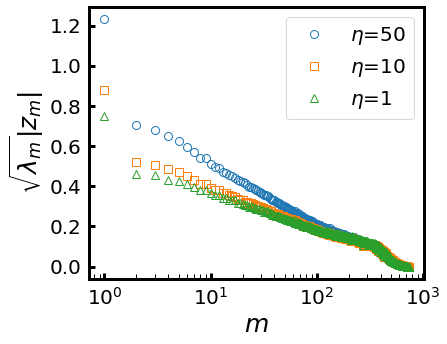

In [10]:
# Loss terms
lwidth = 4
msize = 8
plt.figure(figsize = (6,5))
axis = plt.subplot(111)
y = s.double()
Cy = (y).t().mm(y).cuda().double()
ld, u = torch.linalg.eigh(Cy)
ld/=60000

n = 0

ld, sort_list=torch.sort(ld, descending=True)
u = u[:,sort_list]
v = torch.linalg.inv(torch.eye(784).cuda().double() + w[n])
z = v.mm(u)
zlambda = (z**2).sum(0)*ld
plt.plot( [i+1 for i in range((zlambda>0).sum())] , torch.sqrt(zlambda.cpu()[zlambda>0]),  'o',markerfacecolor = "None" , label = r'$\eta$=' + eta_str[n], markersize = msize)
a,b = np.polyfit([np.log10(i+1) for i in range(300)], torch.log10(zlambda[:300]).cpu().numpy() , 1)
print(a,b)

plt.xticks(fontsize = ssize)
plt.yticks(fontsize = ssize)
plt.ylabel(r'$\lambda_{k}z_{k}^2$', fontsize = bsize)
plt.xlabel(r'$k$', fontsize = bsize)


n = 1

ld, sort_list=torch.sort(ld, descending=True)
u = u[:,sort_list]
v = torch.linalg.inv(torch.eye(784).cuda().double() + w[n])
z = v.mm(u)
zlambda = (z**2).sum(0)*ld
plt.plot( [i+1 for i in range((zlambda>0).sum())] , torch.sqrt(zlambda.cpu()[zlambda>0]),   's', markerfacecolor = "None" ,label = r'$\eta$=' + eta_str[n], markersize = msize)
a,b = np.polyfit([np.log10(i+1) for i in range(300)], torch.log10(zlambda[:300]).cpu().numpy() , 1)
print(a,b)

plt.xticks(fontsize = ssize)
plt.yticks(fontsize = ssize)
plt.ylabel(r'$\lambda_{k}z_{k}^2$', fontsize = bsize)
plt.xlabel(r'$k$', fontsize = bsize)


n = 2

ld, sort_list=torch.sort(ld, descending=True)
u = u[:,sort_list]
v = torch.linalg.inv(torch.eye(784).cuda().double() + w[n])
z = v.mm(u)
zlambda = (z**2).sum(0)*ld
plt.plot( [i+1 for i in range((zlambda>0).sum())] , torch.sqrt(zlambda.cpu()[zlambda>0]),   '^',markerfacecolor = "None" ,label = r'$\eta$=' + eta_str[n], markersize = msize)
a,b = np.polyfit([np.log10(i+1) for i in range(300)], torch.log10(zlambda[:300]).cpu().numpy() , 1)
print(a,b)

plt.semilogx()
plt.xticks(fontsize = ssize)
plt.yticks(fontsize = ssize)
plt.ylabel(r'$\sqrt{\lambda_{m}}|z_{m}|$', fontsize = bsize)
plt.xlabel(r'$m$', fontsize = bsize)


plt.legend(fontsize = ssize)

plt.tick_params(which = 'major', direction = 'in', width = 3, length = 6, pad = 8)
plt.tick_params(which = 'minor', direction = 'in', width = 1, length = 5, pad = 8)
ax = plt.gca()
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
ax.spines['top'].set_linewidth(3)
plt.savefig('fig/fig-7-2-norm of eigenvector representation vs eignvalue.eps', bbox_inches = 'tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


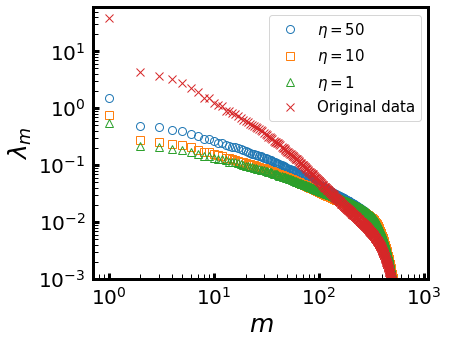

In [11]:
#eigenvalues

MNIST = torchvision.datasets.MNIST('./data/', train = True, download = True, transform = torchvision.transforms.ToTensor())   
s = [i[0].reshape(784) for i in MNIST]
s = torch.stack(s)
lwidth = 4
msize = 8
plt.figure(figsize = (6,5))
axis = plt.subplot(111)
n = 0
v = torch.linalg.inv(torch.eye(784).cuda().double() + w[n])
y = v.mm(s.t().cuda().double())
Cy = (y).mm(y.t()).cuda().double()
ld, u = torch.linalg.eigh(Cy)
ld/=60000

ld, sort_list=torch.sort(ld, descending=True)

plt.plot([i+1 for i in range(784)], (ld/1).cpu(), 'o',markersize = msize,markerfacecolor = "None" ,linewidth = lwidth, label = r'$\eta=50$')

n = 1
v = torch.linalg.inv(torch.eye(784).cuda().double() + w[n])
y = v.mm(s.t().cuda().double())
Cy = (y).mm(y.t()).cuda().double()
ld, u = torch.linalg.eigh(Cy)
ld/=60000

ld, sort_list=torch.sort(ld, descending=True)

plt.plot([i+1 for i in range(784)], (ld/1).cpu(), 's', markersize = msize,markerfacecolor = "None" ,linewidth = lwidth, label = r'$\eta=10$')


n = 2
v = torch.linalg.inv(torch.eye(784).cuda().double() + w[n])
y = v.mm(s.t().cuda().double())
Cy = (y).mm(y.t()).cuda().double()
ld, u = torch.linalg.eigh(Cy)
ld, sort_list=torch.sort(ld, descending=True)
ld/=60000
plt.plot([i+1 for i in range(784)], (ld/1).cpu(), '^',markersize = msize,markerfacecolor = "None",linewidth = lwidth, label = r'$\eta=1$')

plt.ylim([1e-4,0])

Cs = s.t().mm(s)/60000
ld_s, _ = torch.linalg.eigh(Cs)
ld_s,_ = torch.sort(ld_s, descending = True)
plt.plot([i+1 for i in range(784)], ld_s/1, 'x', markersize = msize,linewidth = lwidth, label = 'Original data')


plt.xticks(fontsize = ssize)
plt.yticks( fontsize = ssize )
plt.semilogy()
plt.semilogx()
plt.ylim([1e-3,60])
plt.ylabel(r'$\lambda_{m}$', fontsize = bsize)
plt.xlabel(r'$m$', fontsize = bsize)
#plt.title(r'$\eta = $'+eta_str[n], fontsize = bsize)

plt.legend(fontsize = ssize-5)

plt.tick_params(which = 'major', direction = 'in', width = 3, length = 6, pad = 8)
plt.tick_params(which = 'minor', direction = 'in', width = 1, length = 5, pad = 8)
ax = plt.gca()
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
ax.spines['top'].set_linewidth(3)
#ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(200))

plt.savefig('fig/fig-7-3-norm of eigenvector representation vs eignvalue.eps', bbox_inches = 'tight')

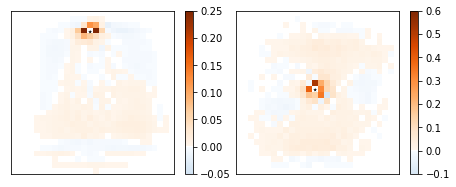

In [12]:
#Receptive field
MNIST = torchvision.datasets.MNIST('./data/', train = True, download = True, transform = torchvision.transforms.ToTensor())   
s = [i[0].reshape(784) for i in MNIST]
s = torch.stack(s)
label = [i[1] for i in MNIST]
y = s.double()
plt.figure(figsize = (8,3))
bottom = mpl.cm.get_cmap('Oranges', 128)

top = mpl.cm.get_cmap('Blues_r', 128)
eta_l = [0,1,2]
n_l = [3*28 + 13, 13*28+13]
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.02,hspace=0.15)
j = 2
for i in range(2):
    plt.subplot(1,2,i+1)
    w_temp = (w[eta_l[j]][n_l[i],:])
    if i == 0:
        newcolors = np.vstack((top(np.linspace(0, 1, 128)[-abs(int(-0.05/0.25*128)):] ), np.array([1,1,1,1]),
                               bottom(np.linspace(0, 1, 128))))
        newcmp = mpl.colors.ListedColormap(newcolors, name='OrangeBlue')
        plt.imshow(w_temp.cpu().reshape(28,28), cmap = newcmp, vmin = -0.05 , vmax = 0.25)
        plt.colorbar()
    else:
        newcolors = np.vstack((top(np.linspace(0, 1, 128)[-abs(int(-0.1/0.6*128)):] ), np.array([1,1,1,1]),
                               bottom(np.linspace(0, 1, 128))))
        newcmp = mpl.colors.ListedColormap(newcolors, name='OrangeBlue')
        plt.imshow(w_temp.cpu().reshape(28,28), cmap = newcmp, vmin = -0.1 , vmax = 0.6)
        plt.colorbar()

    plt.text(  (n_l[i])%28,(n_l[i])//28 , r'$\star$', ha = 'center', va='center')
    plt.xticks([])
    plt.yticks([])

    
plt.savefig('fig/fig-2-Receptivefield.eps', bbox_inches = 'tight')

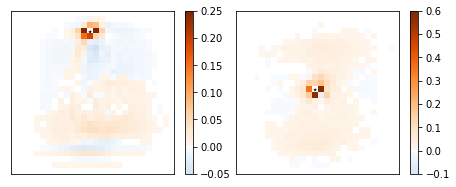

In [13]:
# Projective field
plt.figure(figsize = (8,3))
bottom = mpl.cm.get_cmap('Oranges', 128)
top = mpl.cm.get_cmap('Blues_r', 128)
eta_l = [0,1,2]
n_l = [3*28 + 13, 13*28+13]
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.02,hspace=0.15)
j = 2
for i in range(2):
    plt.subplot(1,2,i+1)
    w_temp = (w[eta_l[j]][:,n_l[i]])
    if i == 0:
        newcolors = np.vstack((top(np.linspace(0, 1, 128)[-abs(int(-0.05/0.25*128)):] ), np.array([1,1,1,1]),
                               bottom(np.linspace(0, 1, 128))))
        newcmp = mpl.colors.ListedColormap(newcolors, name='OrangeBlue')
        plt.imshow(w_temp.cpu().reshape(28,28), cmap = newcmp, vmin = -0.05 , vmax = 0.25)
        plt.colorbar()
    else:
        newcolors = np.vstack((top(np.linspace(0, 1, 128)[-abs(int(-0.1/0.6*128)):] ), np.array([1,1,1,1]),
                               bottom(np.linspace(0, 1, 128))))
        newcmp = mpl.colors.ListedColormap(newcolors, name='OrangeBlue')
        plt.imshow(w_temp.cpu().reshape(28,28), cmap = newcmp, vmin = -0.1 , vmax = 0.6)
        plt.colorbar()

    plt.text(  (n_l[i])%28,(n_l[i])//28 , r'$\star$', ha = 'center', va='center')
    plt.xticks([])
    plt.yticks([])
    
plt.savefig('fig/fig-s2-Projective field.eps', bbox_inches = 'tight')

In [14]:
# nonsymetry index
nons = []
for i in range(3):
    nons.append( ((abs(w[i] - w[i].t())[(w[i]!=0) * (w[i].t()!=0) ]/(abs(w[i]) + abs(w[i].t()))[(w[i]!=0) * (w[i].t()!=0) ]).sum())/((w[i]!=0) * (w[i].t()!=0)).sum() )
print(nons)

[tensor(0.2782, device='cuda:0', dtype=torch.float64), tensor(0.5139, device='cuda:0', dtype=torch.float64), tensor(0.4760, device='cuda:0', dtype=torch.float64)]


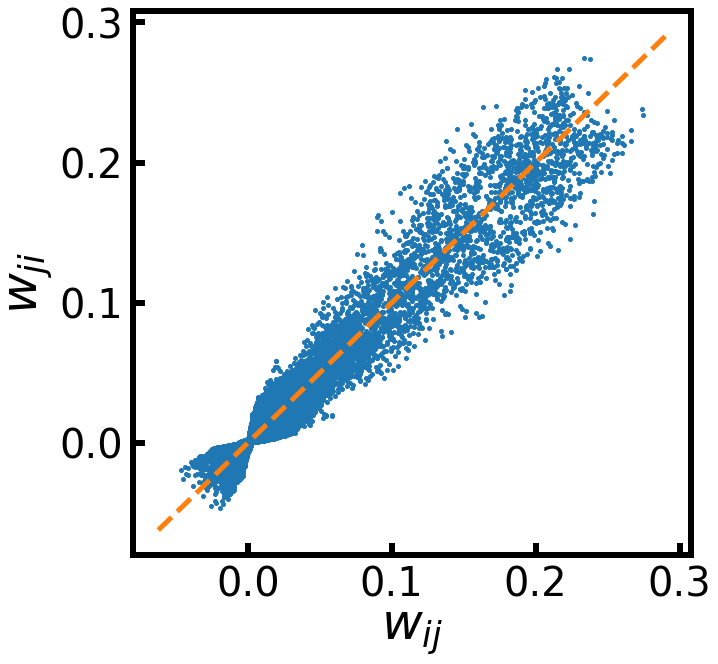

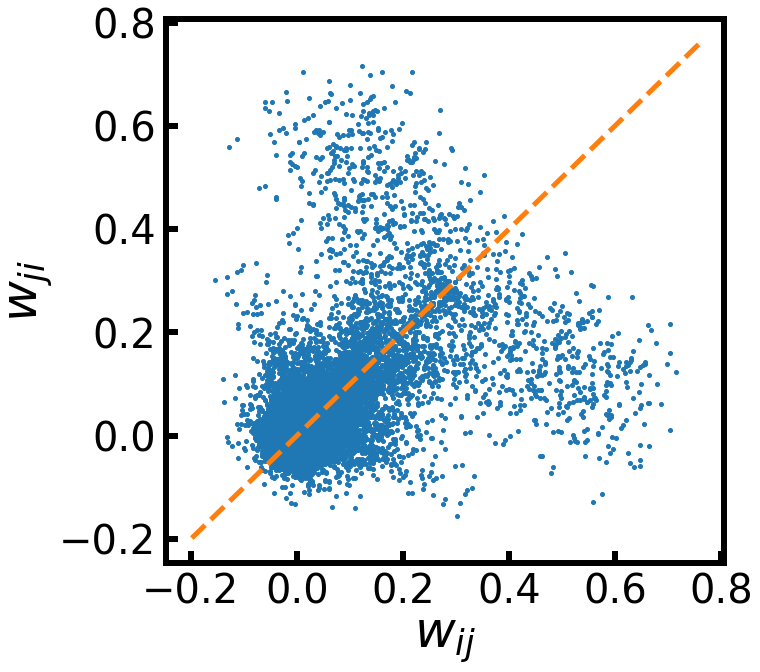

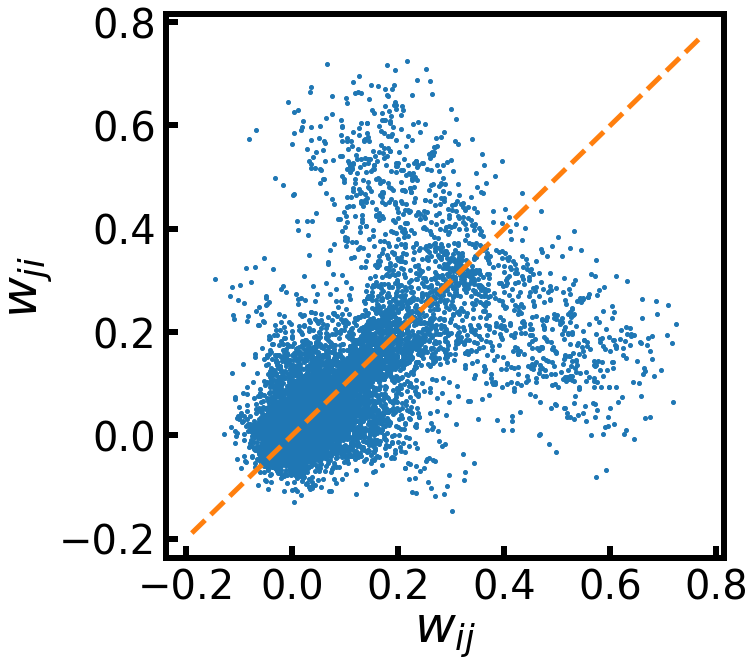

In [15]:
#Nonsymetry exhibition

Bbox = mpl.transforms.Bbox([[-0.5*2,-0.1*2], [6*2,4.8*2]])
for i in range(3):
    plt.figure(figsize = (10,10))
    axis = plt.subplot(111)
    if i==0:
        
        axis.xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.1))
        axis.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.1))
    else:
        axis.xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.2))
        axis.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.2))
    plt.plot(w[i].cpu().reshape(-1), w[i].t().cpu().reshape(-1), '.', markersize = msize)
    #plt.title(r'$\eta$ = '+eta_str[i], fontsize = 2*bsize)
    plt.xlabel(r'$w_{ij}$', fontsize = 2*bsize)
    plt.ylabel(r'$w_{ji}$', fontsize = 2*bsize)
    
    plt.xticks(fontsize = 2*ssize)
    plt.yticks(fontsize = 2*ssize)
    plt.tick_params(which = 'major', direction = 'in', width = 3*2, length = 6*2, pad = 10)
    plt.tick_params(which = 'minor', direction = 'in', width = 1*2, length = 5*2, pad = 10)
    ax = plt.gca()
    ax.spines['bottom'].set_linewidth(6)
    ax.spines['left'].set_linewidth(6)
    ax.spines['right'].set_linewidth(6)
    ax.spines['top'].set_linewidth(6)
    plt.plot(np.array(ax.get_xlim()), np.array(ax.get_xlim()), '--', linewidth = 5)
    
    plt.savefig('fig/fig-11-'+str(i+1)+'-weights symmetry.png', bbox_inches = Bbox)

<Figure size 864x576 with 0 Axes>

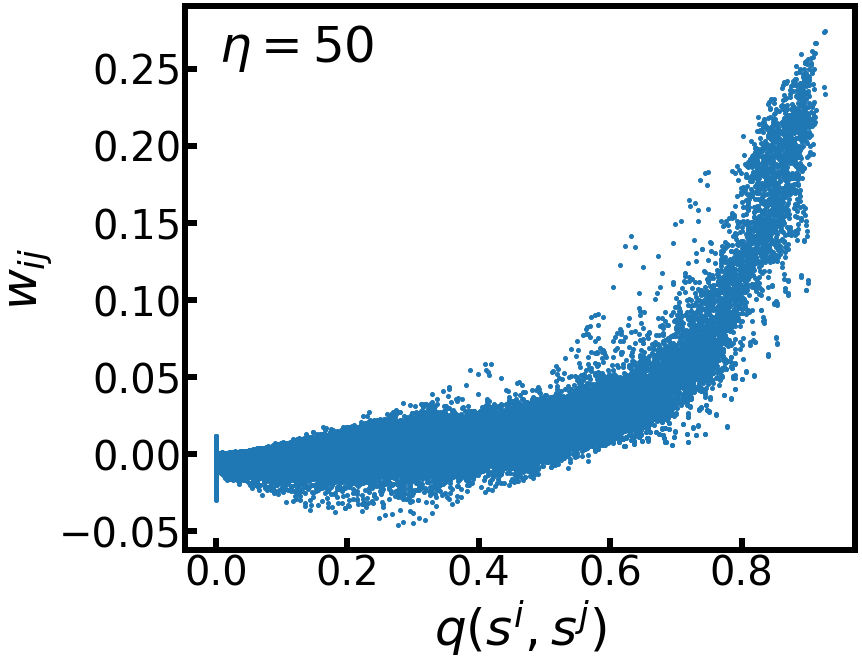

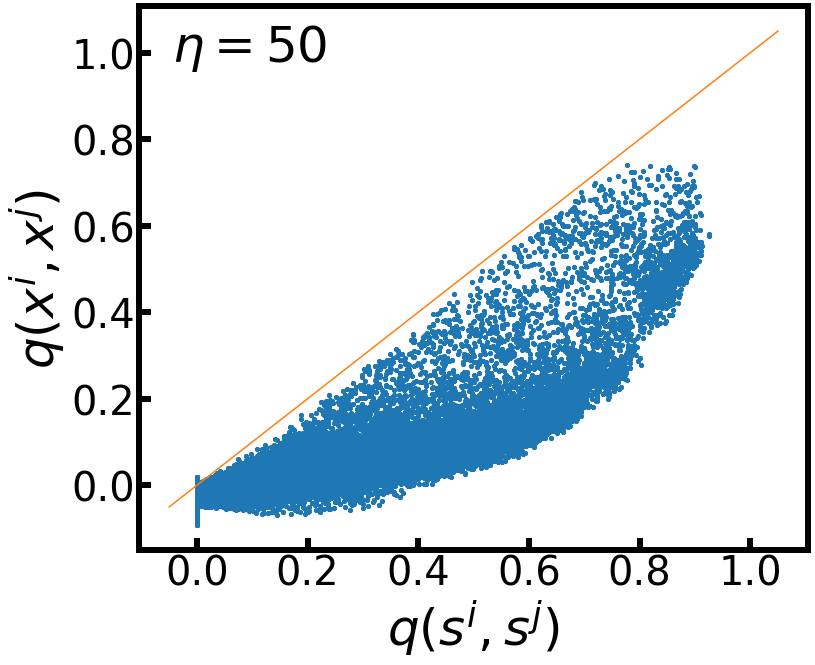

In [16]:
# cosine similarity of eta = 50
MNIST = torchvision.datasets.MNIST('./data/', train = True, download = True, transform = torchvision.transforms.ToTensor())   
s = [i[0].reshape(784) for i in MNIST]
label = torch.tensor([i[1] for i in MNIST])
s = torch.stack(s)
data = [s[label==i] for i in range(10)]

Bbox = mpl.transforms.Bbox([[-0.5*2,-0.1*2], [6*2,4.8*2]])
y = s.double()
Cy = (y).t().mm(y).cuda().double()
Cy_diag = torch.diag(Cy)
C_large = ((y!=0).sum(0)>=100)
Dy = torch.sqrt( Cy_diag.reshape(-1,1).mm(Cy_diag.reshape(1,-1)))
Cy = Cy[C_large][:, C_large]/Dy[C_large][:, C_large]

n_eta_l = 0

plt.figure(figsize = (12,8))
#plt.subplot(3,3,3*i+1)
x = torch.linalg.inv(torch.eye(784).cuda() + w[n_eta_l]).mm(s.t().cuda().double())
Cx = x.mm(x.t())
Cx_diag = torch.diag(Cx)
D = torch.sqrt( Cx_diag.reshape(-1,1).mm(Cx_diag.reshape(1,-1)))
Cx = Cx[C_large][:, C_large]/ D[C_large][:, C_large]
w_temp = w[n_eta_l][C_large][:, C_large]



plt.figure(figsize = (12,10))
plt.plot(Cy[torch.eye(Cx.shape[0])!=1].reshape(-1).cpu(), w_temp[torch.eye(Cx.shape[0])!=1].reshape(-1).cpu(),  '.', markersize = msize)
pcor = np.corrcoef( (Cy[torch.eye(Cx.shape[0])!=1].reshape(-1).cpu()).numpy(), w_temp[torch.eye(Cx.shape[0])!=1].reshape(-1).cpu().numpy())
plt.xlabel(r'$q(s^i, s^j)$', fontsize = 2*bsize)
plt.ylabel(r'$w_{ij}$', fontsize = 2*bsize)
plt.annotate('$\eta=$'+eta_str[n_eta_l] , [0.05,0.9], xycoords = 'axes fraction',fontsize = 2*bsize)
plt.xticks(fontsize = 2*ssize)
plt.yticks(fontsize = 2*ssize)
plt.tick_params(which = 'major', direction = 'in', width = 3*2, length = 6*2)
plt.tick_params(which = 'minor', direction = 'in', width = 1*2, length = 5*2)
ax = plt.gca()
ax.spines['bottom'].set_linewidth(6)
ax.spines['left'].set_linewidth(6)
ax.spines['right'].set_linewidth(6)
ax.spines['top'].set_linewidth(6)
plt.savefig('fig/fig-4-1-weights and correlation.png', bbox_inches = Bbox)

plt.figure(figsize = (12,10))
plt.plot(Cy[torch.eye(Cx.shape[0])!=1].reshape(-1).cpu(), Cx[torch.eye(Cx.shape[0])!=1].reshape(-1).cpu(),  '.', markersize = msize)
#plt.plot(Cy[torch.eye(Cx.shape[0])!=0].reshape(-1).cpu(), Cx[torch.eye(Cx.shape[0])!=0].reshape(-1).cpu(),  'r.')
plt.xticks(fontsize = 2*ssize)
plt.yticks(fontsize = 2*ssize)
#pcor = np.corrcoef( (Cy[torch.eye(Cx.shape[0])!=1].reshape(-1).cpu()).numpy(), Cx[torch.eye(Cx.shape[0])!=1].reshape(-1).cpu().numpy())
plt.xlabel(r'$q(s^i, s^j)$', fontsize = 2*bsize)
plt.ylabel(r'$q(x^i, x^j)$', fontsize = 2*bsize)
plt.plot([i/10-1/20 for i in range(12)], [i/10-1/20 for i in range(12)])
plt.annotate('$\eta=$'+eta_str[n_eta_l] , [0.05,0.9], xycoords = 'axes fraction',fontsize = 2*bsize)
plt.tick_params(which = 'major', direction = 'in', width = 3*2, length = 6*2)
plt.tick_params(which = 'minor', direction = 'in', width = 1*2, length = 5*2)
ax = plt.gca()
ax.spines['bottom'].set_linewidth(6)
ax.spines['left'].set_linewidth(6)
ax.spines['right'].set_linewidth(6)
ax.spines['top'].set_linewidth(6)
plt.savefig('fig/fig-4-4-weights and correlation.png', bbox_inches = Bbox)

<Figure size 864x576 with 0 Axes>

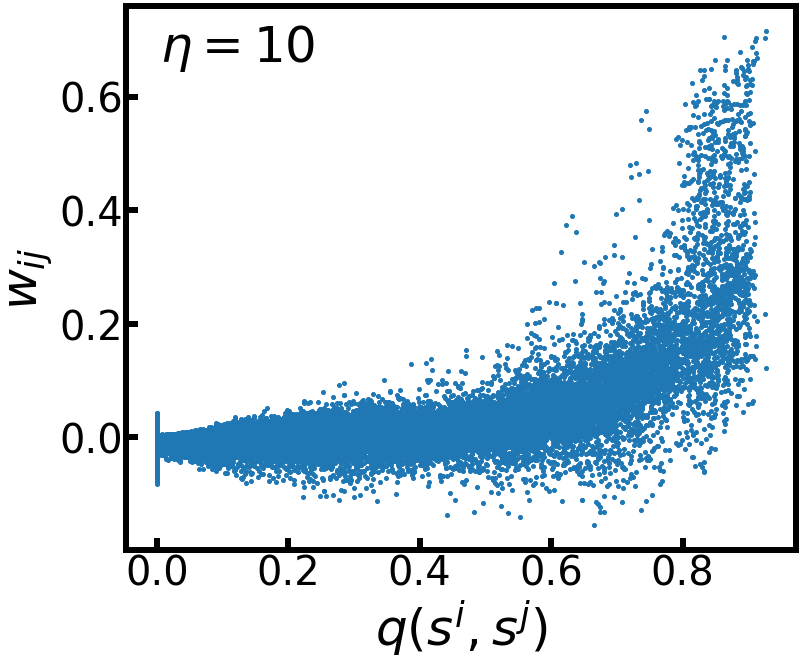

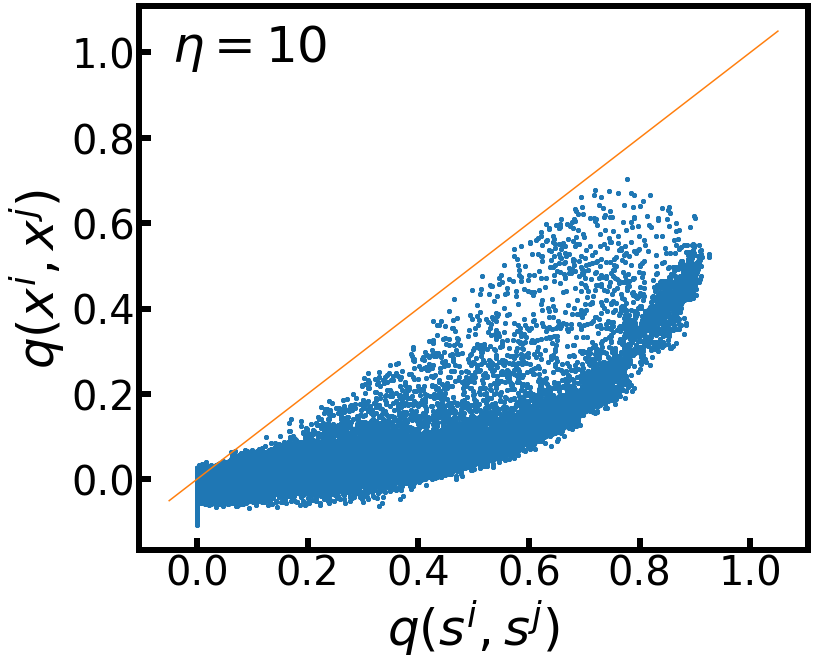

In [17]:
# cosine similarity of eta = 10
y = s.double()
Cy = (y).t().mm(y).cuda().double()
Cy_diag = torch.diag(Cy)
C_large = ((y!=0).sum(0)>=100)
Dy = torch.sqrt( Cy_diag.reshape(-1,1).mm(Cy_diag.reshape(1,-1)))
Cy = Cy[C_large][:, C_large]/Dy[C_large][:, C_large]

n_eta_l = 1

plt.figure(figsize = (12,8))
#plt.subplot(3,3,3*i+1)
x = torch.linalg.inv(torch.eye(784).cuda() + w[n_eta_l]).mm(s.t().cuda().double())
Cx = x.mm(x.t())
Cx_diag = torch.diag(Cx)
D = torch.sqrt( Cx_diag.reshape(-1,1).mm(Cx_diag.reshape(1,-1)))
Cx = Cx[C_large][:, C_large]/ D[C_large][:, C_large]
w_temp = w[n_eta_l][C_large][:, C_large]


plt.figure(figsize = (12,10))
plt.plot(Cy[torch.eye(Cx.shape[0])!=1].reshape(-1).cpu(), w_temp[torch.eye(Cx.shape[0])!=1].reshape(-1).cpu(),  '.', markersize = msize)
pcor = np.corrcoef( (Cy[torch.eye(Cx.shape[0])!=1].reshape(-1).cpu()).numpy(), w_temp[torch.eye(Cx.shape[0])!=1].reshape(-1).cpu().numpy())
plt.xlabel(r'$q(s^i, s^j)$', fontsize = 2*bsize)
plt.ylabel(r'$w_{ij}$', fontsize = 2*bsize)
plt.annotate('$\eta=$'+eta_str[n_eta_l] , [0.05,0.9], xycoords = 'axes fraction',fontsize = 2*bsize)
plt.xticks(fontsize = 2*ssize)
plt.yticks(fontsize = 2*ssize)
plt.tick_params(which = 'major', direction = 'in', width = 3*2, length = 6*2)
plt.tick_params(which = 'minor', direction = 'in', width = 1*2, length = 5*2)
ax = plt.gca()
ax.spines['bottom'].set_linewidth(6)
ax.spines['left'].set_linewidth(6)
ax.spines['right'].set_linewidth(6)
ax.spines['top'].set_linewidth(6)
plt.savefig('fig/fig-4-2-weights and correlation.png', bbox_inches = Bbox)

plt.figure(figsize = (12,10))
plt.plot(Cy[torch.eye(Cx.shape[0])!=1].reshape(-1).cpu(), Cx[torch.eye(Cx.shape[0])!=1].reshape(-1).cpu(),  '.', markersize = msize)
#plt.plot(Cy[torch.eye(Cx.shape[0])!=0].reshape(-1).cpu(), Cx[torch.eye(Cx.shape[0])!=0].reshape(-1).cpu(),  'r.')
plt.xticks(fontsize = 2*ssize)
plt.yticks(fontsize = 2*ssize)
#pcor = np.corrcoef( (Cy[torch.eye(Cx.shape[0])!=1].reshape(-1).cpu()).numpy(), Cx[torch.eye(Cx.shape[0])!=1].reshape(-1).cpu().numpy())
plt.xlabel(r'$q(s^i, s^j)$', fontsize = 2*bsize)
plt.ylabel(r'$q(x^i, x^j)$', fontsize = 2*bsize)
plt.plot([i/10-1/20 for i in range(12)], [i/10-1/20 for i in range(12)])
plt.annotate('$\eta=$'+eta_str[n_eta_l] , [0.05,0.9], xycoords = 'axes fraction',fontsize = 2*bsize)
plt.tick_params(which = 'major', direction = 'in', width = 3*2, length = 6*2)
plt.tick_params(which = 'minor', direction = 'in', width = 1*2, length = 5*2)
ax = plt.gca()
ax.spines['bottom'].set_linewidth(6)
ax.spines['left'].set_linewidth(6)
ax.spines['right'].set_linewidth(6)
ax.spines['top'].set_linewidth(6)
plt.savefig('fig/fig-4-5-weights and correlation.png', bbox_inches = Bbox)

<Figure size 864x576 with 0 Axes>

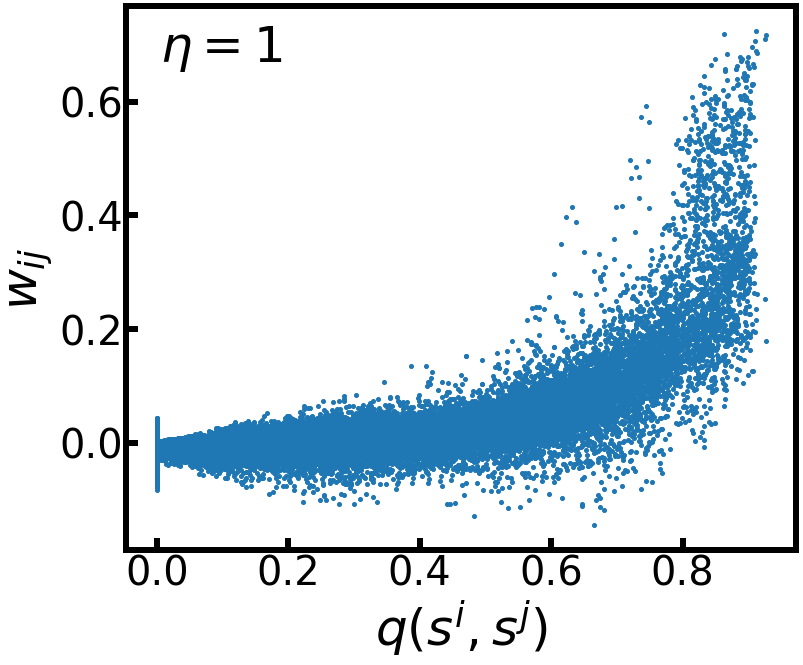

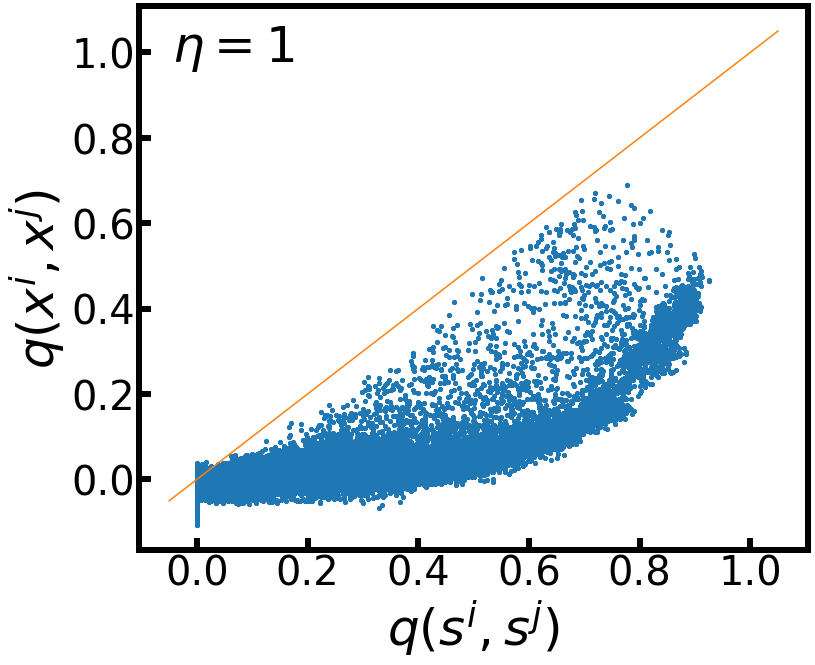

In [18]:
# cosine similarity of eta = 1
y = s.double()
Cy = (y).t().mm(y).cuda().double()
Cy_diag = torch.diag(Cy)
C_large = ((y!=0).sum(0)>=100)
Dy = torch.sqrt( Cy_diag.reshape(-1,1).mm(Cy_diag.reshape(1,-1)))
Cy = Cy[C_large][:, C_large]/Dy[C_large][:, C_large]

n_eta_l = 2

plt.figure(figsize = (12,8))
#plt.subplot(3,3,3*i+1)
x = torch.linalg.inv(torch.eye(784).cuda() + w[n_eta_l]).mm(s.t().cuda().double())
Cx = x.mm(x.t())
Cx_diag = torch.diag(Cx)
D = torch.sqrt( Cx_diag.reshape(-1,1).mm(Cx_diag.reshape(1,-1)))
Cx = Cx[C_large][:, C_large]/ D[C_large][:, C_large]
w_temp = w[n_eta_l][C_large][:, C_large]



plt.figure(figsize = (12,10))
plt.plot(Cy[torch.eye(Cx.shape[0])!=1].reshape(-1).cpu(), w_temp[torch.eye(Cx.shape[0])!=1].reshape(-1).cpu(),  '.', markersize = msize)
pcor = np.corrcoef( (Cy[torch.eye(Cx.shape[0])!=1].reshape(-1).cpu()).numpy(), w_temp[torch.eye(Cx.shape[0])!=1].reshape(-1).cpu().numpy())
plt.xlabel(r'$q(s^i, s^j)$', fontsize = 2*bsize)
plt.ylabel(r'$w_{ij}$', fontsize = 2*bsize)
plt.annotate('$\eta=$'+eta_str[n_eta_l] , [0.05,0.9], xycoords = 'axes fraction',fontsize = 2*bsize)
plt.xticks(fontsize = 2*ssize)
plt.yticks(fontsize = 2*ssize)
plt.tick_params(which = 'major', direction = 'in', width = 3*2, length = 6*2)
plt.tick_params(which = 'minor', direction = 'in', width = 1*2, length = 5*2)
ax = plt.gca()
ax.spines['bottom'].set_linewidth(6)
ax.spines['left'].set_linewidth(6)
ax.spines['right'].set_linewidth(6)
ax.spines['top'].set_linewidth(6)
plt.savefig('fig/fig-4-3-weights and correlation.png', bbox_inches = Bbox)

plt.figure(figsize = (12,10))
plt.plot(Cy[torch.eye(Cx.shape[0])!=1].reshape(-1).cpu(), Cx[torch.eye(Cx.shape[0])!=1].reshape(-1).cpu(),  '.', markersize = msize)
#plt.plot(Cy[torch.eye(Cx.shape[0])!=0].reshape(-1).cpu(), Cx[torch.eye(Cx.shape[0])!=0].reshape(-1).cpu(),  'r.')
plt.xticks(fontsize = 2*ssize)
plt.yticks(fontsize = 2*ssize)
#pcor = np.corrcoef( (Cy[torch.eye(Cx.shape[0])!=1].reshape(-1).cpu()).numpy(), Cx[torch.eye(Cx.shape[0])!=1].reshape(-1).cpu().numpy())
plt.xlabel(r'$q(s^i, s^j)$', fontsize = 2*bsize)
plt.ylabel(r'$q(x^i, x^j)$', fontsize = 2*bsize)
plt.plot([i/10-1/20 for i in range(12)], [i/10-1/20 for i in range(12)])
plt.annotate('$\eta=$'+eta_str[n_eta_l] , [0.05,0.9], xycoords = 'axes fraction',fontsize = 2*bsize)
plt.tick_params(which = 'major', direction = 'in', width = 3*2, length = 6*2)
plt.tick_params(which = 'minor', direction = 'in', width = 1*2, length = 5*2)
ax = plt.gca()
ax.spines['bottom'].set_linewidth(6)
ax.spines['left'].set_linewidth(6)
ax.spines['right'].set_linewidth(6)
ax.spines['top'].set_linewidth(6)
plt.savefig('fig/fig-4-6-weights and correlation.png', bbox_inches = Bbox)

tensor([], size=(0, 1), dtype=torch.float64)
tensor(1., dtype=torch.float64)
tensor([[-0.4534],
        [-0.3816],
        [-0.3130],
        [-0.8275],
        [-0.4370],
        [-0.4393],
        [-0.3382],
        [-0.3807],
        [-0.9791],
        [-0.0569],
        [-0.2662],
        [-0.5532],
        [-0.1137],
        [-0.2975],
        [-0.3208],
        [-0.6760],
        [-0.6726],
        [-0.2969],
        [-0.3459],
        [-0.8229]], dtype=torch.float64)
tensor(1., dtype=torch.float64)


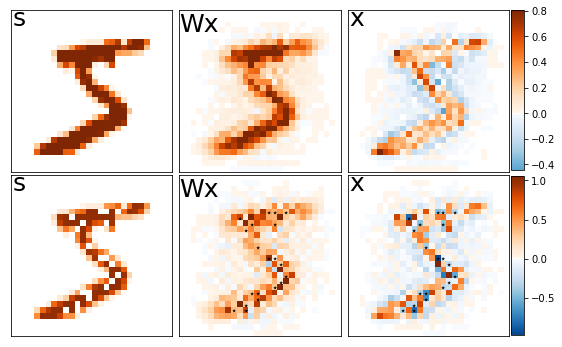

In [19]:
# Mask input

n = np.array([i for i in range(784)])
fig = plt.figure(figsize = (9,6))
bottom = mpl.cm.get_cmap('Oranges', 128)
#interval = mpl.cm.get_cmap('White', 1024)
top = mpl.cm.get_cmap('Blues_r', 128)
n_list = [0, 20]
m = 2
ccolorbarposition = [ [0.9,0.51,0.02,0.37], [0.9,0.127,0.02,0.37]]
np.random.seed(0)
for i in range(2):
    ax = []
    ax.append(plt.subplot(2,3,1+i*3))
    n_lesion = n_list[i]
    s0 = s[0]*1
    lesion = np.random.choice(n[s0>0.8], size = (n_lesion), replace= False)
    n_1 = [(n[i] in lesion) for i in range(784)]
    n_2 = [not (n[i] in lesion) for i in range(784)]
    mask = np.ones(784)
    mask[n_1] = 0
    s0 = s[0]*mask
    x0 = (torch.linalg.inv(torch.eye(784 ).double() + w[m].cpu()).mm(s0.reshape(-1,1).double()))
    re1 = x0
    p_x0 = re1[n_1]
    print(p_x0)
    if abs(re1.min())>abs(re1.max()):
        newcolors = np.vstack((top(np.linspace(0, 1, 128) ), np.array([1,1,1,1]),
                                   bottom(np.linspace(0, 1, 128)[:abs(int(re1.max()/re1.min()*128))])))
    else:
        newcolors = np.vstack((top(np.linspace(0, 1, 128)[-abs(int(re1.min()/re1.max()*128)):] ), np.array([1,1,1,1]),
                                   bottom(np.linspace(0, 1, 128))))
    newcmp = mpl.colors.ListedColormap(newcolors, name='OrangeBlue')
    plt.imshow((s0*mask).reshape(28,28), cmap = newcmp, vmin = re1.min(), vmax = re1.max())
    #plt.colorbar()
    #plt.title('Original image (s)', fontsize = bsize)
    plt.text(  1,1 , 's', ha = 'center', va='center', fontsize = 25)
    plt.xticks([])
    plt.yticks([])
    
    print((s0*mask).reshape(28,28).max())
    ax.append(plt.subplot( 2, 3,  i*3+3))
    
    a = plt.imshow(re1.reshape(28,28) , cmap = newcmp, vmin = re1.min(), vmax = re1.max())
    
    n_1_index = np.array([i for i in range(784)])[n_1]
    for j in range(len(n_1_index)):
        #print(len(n_1))
        plt.text(  (n_1_index[j])%28,(n_1_index[j])//28 , r'$\star$', ha = 'center', va='center')
    plt.xticks([])
    plt.yticks([])
    #plt.colorbar()
    #plt.title(r'Representation', fontsize = bsize)
    plt.text(  1,1 , 'x', ha = 'center', va='center', fontsize = 25)
    
    ax.append( plt.subplot( 2, 3, 2 + i*3) )
    
    plt.imshow(w[m].cpu().mm(re1).reshape(28,28) , cmap = newcmp, vmin = re1.min(), vmax = re1.max())
    
    n_1_index = np.array([i for i in range(784)])[n_1]
    for j in range(len(n_1_index)):
        #print(len(n_1))
        plt.text(  (n_1_index[j])%28,(n_1_index[j])//28 , r'$\star$', ha = 'center', va='center')
    plt.xticks([])
    plt.yticks([])
    #plt.colorbar()
    #plt.title(r'Prediction', fontsize = bsize)
    plt.text(  3,2 , 'Wx', ha = 'center', va='center', fontsize = 25)
    position = fig.add_axes(ccolorbarposition[i])
    #position = plt.subplot(2,1,1)
    fig.colorbar(a, cax = position, shrink = 1)
plt.subplots_adjust(wspace = 0.02, hspace = 0.02)
plt.savefig('fig/fig-s3-prediction of masked elements.eps', bbox_inches = 'tight')

In [87]:
#Decay time of eta = 50

MNIST = torchvision.datasets.MNIST('./data/', train = True, download = True, transform = torchvision.transforms.ToTensor())   
s = [i[0].reshape(784) for i in MNIST]
label = np.array([i[1] for i in MNIST])
s = torch.stack(s).double().cuda()

m = 0

ld, u = torch.linalg.eig( torch.eye(784).cuda() + w[m] )
v = torch.linalg.inv( torch.eye(784).cuda() + w[m] )
x = v.mm( s.t() )

stable = ((s.t())**2).mean(0)

#residual = torch.linalg.inv(u).mm( torch.diag( torch.exp(-ld*0 ))).mm(u).mm(torch.complex(x, torch.zeros(x.shape).cuda().double()))
p = []
decay_time = torch.zeros(60000).cuda()-1
for i in range(400):
    residual = u.mm( torch.diag( torch.exp(-ld*i/200 )) ).mm(torch.linalg.inv(u)).mm(torch.complex(s.t(), torch.zeros(s.t().shape).cuda().double()))
    p.append(torch.sqrt((residual*residual.conj()).mean(0)/stable).real)
    decay_time[(decay_time<0 )*(p[-1] < 1/np.e)] = i/200
    print(i, (decay_time!=-1).sum())



MNIST = torchvision.datasets.MNIST('./data/', train = True, download = True, transform = torchvision.transforms.ToTensor())   
s = [i[0].reshape(784) for i in MNIST]
label = np.array([i[1] for i in MNIST])
s = torch.stack(s).double().cuda()

np.random.seed(0)
n = [i for i in range(784)]
np.random.shuffle(n)
s = s[:, n]

ld, u = torch.linalg.eig( torch.eye(784).cuda() + w[m] )
v = torch.linalg.inv( torch.eye(784).cuda() + w[m] )
x = v.mm(s.t())

stable = ((s.t())**2).mean(0)

#residual = torch.linalg.inv(u).mm( torch.diag( torch.exp(-ld*0 ))).mm(u).mm(torch.complex(x, torch.zeros(x.shape).cuda().double()))
p_s = []
decay_time_s = torch.zeros(60000).cuda()-1
for i in range(400):
    residual = u.mm( torch.diag( torch.exp(-ld*i/200 )) ).mm(torch.linalg.inv(u)).mm(torch.complex(s.t(), torch.zeros(s.t().shape).cuda().double()))
    p_s.append(torch.sqrt((residual*residual.conj()).mean(0)/stable).real)
    decay_time_s[(decay_time_s<0 )*(p_s[-1] < 1/np.e)] = i/200
    print(i, (decay_time_s!=-1).sum())

0 tensor(0, device='cuda:0')
1 tensor(0, device='cuda:0')
2 tensor(0, device='cuda:0')
3 tensor(0, device='cuda:0')
4 tensor(0, device='cuda:0')
5 tensor(0, device='cuda:0')
6 tensor(0, device='cuda:0')
7 tensor(0, device='cuda:0')
8 tensor(0, device='cuda:0')
9 tensor(0, device='cuda:0')
10 tensor(0, device='cuda:0')
11 tensor(0, device='cuda:0')
12 tensor(0, device='cuda:0')
13 tensor(0, device='cuda:0')
14 tensor(0, device='cuda:0')
15 tensor(0, device='cuda:0')
16 tensor(0, device='cuda:0')
17 tensor(0, device='cuda:0')
18 tensor(0, device='cuda:0')
19 tensor(0, device='cuda:0')
20 tensor(0, device='cuda:0')
21 tensor(0, device='cuda:0')
22 tensor(0, device='cuda:0')
23 tensor(0, device='cuda:0')
24 tensor(0, device='cuda:0')
25 tensor(0, device='cuda:0')
26 tensor(0, device='cuda:0')
27 tensor(0, device='cuda:0')
28 tensor(0, device='cuda:0')
29 tensor(0, device='cuda:0')
30 tensor(0, device='cuda:0')
31 tensor(0, device='cuda:0')
32 tensor(0, device='cuda:0')
33 tensor(0, device=

92 tensor(0, device='cuda:0')
93 tensor(0, device='cuda:0')
94 tensor(0, device='cuda:0')
95 tensor(0, device='cuda:0')
96 tensor(0, device='cuda:0')
97 tensor(0, device='cuda:0')
98 tensor(0, device='cuda:0')
99 tensor(0, device='cuda:0')
100 tensor(0, device='cuda:0')
101 tensor(0, device='cuda:0')
102 tensor(0, device='cuda:0')
103 tensor(0, device='cuda:0')
104 tensor(0, device='cuda:0')
105 tensor(0, device='cuda:0')
106 tensor(0, device='cuda:0')
107 tensor(0, device='cuda:0')
108 tensor(0, device='cuda:0')
109 tensor(0, device='cuda:0')
110 tensor(0, device='cuda:0')
111 tensor(0, device='cuda:0')
112 tensor(0, device='cuda:0')
113 tensor(0, device='cuda:0')
114 tensor(0, device='cuda:0')
115 tensor(0, device='cuda:0')
116 tensor(0, device='cuda:0')
117 tensor(0, device='cuda:0')
118 tensor(0, device='cuda:0')
119 tensor(0, device='cuda:0')
120 tensor(0, device='cuda:0')
121 tensor(0, device='cuda:0')
122 tensor(0, device='cuda:0')
123 tensor(0, device='cuda:0')
124 tensor(0, de

338 tensor(60000, device='cuda:0')
339 tensor(60000, device='cuda:0')
340 tensor(60000, device='cuda:0')
341 tensor(60000, device='cuda:0')
342 tensor(60000, device='cuda:0')
343 tensor(60000, device='cuda:0')
344 tensor(60000, device='cuda:0')
345 tensor(60000, device='cuda:0')
346 tensor(60000, device='cuda:0')
347 tensor(60000, device='cuda:0')
348 tensor(60000, device='cuda:0')
349 tensor(60000, device='cuda:0')
350 tensor(60000, device='cuda:0')
351 tensor(60000, device='cuda:0')
352 tensor(60000, device='cuda:0')
353 tensor(60000, device='cuda:0')
354 tensor(60000, device='cuda:0')
355 tensor(60000, device='cuda:0')
356 tensor(60000, device='cuda:0')
357 tensor(60000, device='cuda:0')
358 tensor(60000, device='cuda:0')
359 tensor(60000, device='cuda:0')
360 tensor(60000, device='cuda:0')
361 tensor(60000, device='cuda:0')
362 tensor(60000, device='cuda:0')
363 tensor(60000, device='cuda:0')
364 tensor(60000, device='cuda:0')
365 tensor(60000, device='cuda:0')
366 tensor(60000, de

In [21]:
p, p_s, p_decay, decay_time, decay_time_s = torch.load( 'charateristic_time_1_eta=50')

In [ ]:
m=0
plt.figure(figsize = (6,5))
p_decay = []
axis = plt.subplot(1,1,1)
for i in range(400):
    p_decay.append(np.exp(-i/200))
    #print(i,p_decay[-1])
plt.plot([i/200 for i in range(400)], [i.mean().cpu() for i in p], label = 'Origin', linewidth = lwidth)
plt.plot([i/200 for i in range(400)], [i.mean().cpu() for i in p_s], label = 'Shuffle', linewidth = lwidth)
#plt.plot([i/200 for i in range(400)], [i.mean().cpu() for i in p_test], label = 'Test')
plt.plot([i/200 for i in range(400)], p_decay, '--',color = 'gray', linewidth = lwidth)
plt.axhline(1/np.e, linestyle='--', color = 'r', linewidth = lwidth)

plt.legend(fontsize = ssize)
axis.xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.4))
plt.xticks(fontsize = ssize)
plt.yticks(fontsize = ssize)
plt.tick_params(which = 'major', direction = 'in', width = 3, length = 6)
plt.tick_params(which = 'minor', direction = 'in', width = 1, length = 5)
ax = plt.gca()
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
ax.spines['top'].set_linewidth(3)
plt.xlabel('t', fontsize = 25)
plt.ylabel(r'Residual norm', fontsize = bsize)
plt.title(r'$\eta$ = '+str(eta_str[m]), fontsize = bsize)
plt.savefig('fig/fig-s4-1-characteristic time.pdf', bbox_inches = 'tight')

plt.figure(figsize = (6,5))
plt.hist(decay_time.cpu().reshape(1,-1), bins =40, density = False)
plt.title('Distribution of characteristic time',fontsize =20)
plt.xlabel('t', fontsize = 25)
plt.semilogy()
plt.xticks(fontsize = ssize)
plt.yticks(fontsize = ssize)
plt.tick_params(which = 'major', direction = 'in', width = 3, length = 6)
plt.tick_params(which = 'minor', direction = 'in', width = 1, length = 5)
ax = plt.gca()
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
ax.spines['top'].set_linewidth(3)
plt.title(r'$\eta$ = '+str(eta_str[m]), fontsize = bsize)
plt.savefig('fig/fig-s5-1-characteristic time.eps', bbox_inches = 'tight')

In [18]:
torch.save([p.copy(), p_s.copy(), p_decay, decay_time, decay_time_s], 'charateristic_time_1_eta=50')

In [90]:
# Decay time of eta = 10

MNIST = torchvision.datasets.MNIST('./data/', train = True, download = True, transform = torchvision.transforms.ToTensor())   
s = [i[0].reshape(784) for i in MNIST]
label = np.array([i[1] for i in MNIST])
s = torch.stack(s).double().cuda()

m = 1

ld, u = torch.linalg.eig( torch.eye(784).cuda() + w[m] )
v = torch.linalg.inv( torch.eye(784).cuda() + w[m] )
x = v.mm( s.t() )

stable = ((s.t())**2).mean(0)

#residual = torch.linalg.inv(u).mm( torch.diag( torch.exp(-ld*0 ))).mm(u).mm(torch.complex(x, torch.zeros(x.shape).cuda().double()))
p = []
decay_time = torch.zeros(60000).cuda()-1
for i in range(400):
    residual = u.mm( torch.diag( torch.exp(-ld*i/200 )) ).mm(torch.linalg.inv(u)).mm(torch.complex(s.t(), torch.zeros(s.t().shape).cuda().double()))
    p.append(torch.sqrt((residual*residual.conj()).mean(0)/stable).real)
    decay_time[(decay_time<0 )*(p[-1] < 1/np.e)] = i/200
    print(i, (decay_time!=-1).sum())



MNIST = torchvision.datasets.MNIST('./data/', train = True, download = True, transform = torchvision.transforms.ToTensor())   
s = [i[0].reshape(784) for i in MNIST]
label = np.array([i[1] for i in MNIST])
s = torch.stack(s).double().cuda()

np.random.seed(0)
n = [i for i in range(784)]
np.random.shuffle(n)
s = s[:, n]

ld, u = torch.linalg.eig( torch.eye(784).cuda() + w[m] )
v = torch.linalg.inv( torch.eye(784).cuda() + w[m] )
x = v.mm(s.t())

stable = ((s.t())**2).mean(0)

#residual = torch.linalg.inv(u).mm( torch.diag( torch.exp(-ld*0 ))).mm(u).mm(torch.complex(x, torch.zeros(x.shape).cuda().double()))
p_s = []
decay_time_s = torch.zeros(60000).cuda()-1
for i in range(400):
    residual = u.mm( torch.diag( torch.exp(-ld*i/200 )) ).mm(torch.linalg.inv(u)).mm(torch.complex(s.t(), torch.zeros(s.t().shape).cuda().double()))
    p_s.append(torch.sqrt((residual*residual.conj()).mean(0)/stable).real)
    decay_time_s[(decay_time_s<0 )*(p_s[-1] < 1/np.e)] = i/200
    print(i, (decay_time_s!=-1).sum())

0 tensor(0, device='cuda:0')
1 tensor(0, device='cuda:0')
2 tensor(0, device='cuda:0')
3 tensor(0, device='cuda:0')
4 tensor(0, device='cuda:0')
5 tensor(0, device='cuda:0')
6 tensor(0, device='cuda:0')
7 tensor(0, device='cuda:0')
8 tensor(0, device='cuda:0')
9 tensor(0, device='cuda:0')
10 tensor(0, device='cuda:0')
11 tensor(0, device='cuda:0')
12 tensor(0, device='cuda:0')
13 tensor(0, device='cuda:0')
14 tensor(0, device='cuda:0')
15 tensor(0, device='cuda:0')
16 tensor(0, device='cuda:0')
17 tensor(0, device='cuda:0')
18 tensor(0, device='cuda:0')
19 tensor(0, device='cuda:0')
20 tensor(0, device='cuda:0')
21 tensor(0, device='cuda:0')
22 tensor(0, device='cuda:0')
23 tensor(0, device='cuda:0')
24 tensor(0, device='cuda:0')
25 tensor(0, device='cuda:0')
26 tensor(0, device='cuda:0')
27 tensor(0, device='cuda:0')
28 tensor(0, device='cuda:0')
29 tensor(0, device='cuda:0')
30 tensor(0, device='cuda:0')
31 tensor(0, device='cuda:0')
32 tensor(0, device='cuda:0')
33 tensor(0, device=

243 tensor(60000, device='cuda:0')
244 tensor(60000, device='cuda:0')
245 tensor(60000, device='cuda:0')
246 tensor(60000, device='cuda:0')
247 tensor(60000, device='cuda:0')
248 tensor(60000, device='cuda:0')
249 tensor(60000, device='cuda:0')
250 tensor(60000, device='cuda:0')
251 tensor(60000, device='cuda:0')
252 tensor(60000, device='cuda:0')
253 tensor(60000, device='cuda:0')
254 tensor(60000, device='cuda:0')
255 tensor(60000, device='cuda:0')
256 tensor(60000, device='cuda:0')
257 tensor(60000, device='cuda:0')
258 tensor(60000, device='cuda:0')
259 tensor(60000, device='cuda:0')
260 tensor(60000, device='cuda:0')
261 tensor(60000, device='cuda:0')
262 tensor(60000, device='cuda:0')
263 tensor(60000, device='cuda:0')
264 tensor(60000, device='cuda:0')
265 tensor(60000, device='cuda:0')
266 tensor(60000, device='cuda:0')
267 tensor(60000, device='cuda:0')
268 tensor(60000, device='cuda:0')
269 tensor(60000, device='cuda:0')
270 tensor(60000, device='cuda:0')
271 tensor(60000, de

91 tensor(0, device='cuda:0')
92 tensor(0, device='cuda:0')
93 tensor(0, device='cuda:0')
94 tensor(0, device='cuda:0')
95 tensor(0, device='cuda:0')
96 tensor(0, device='cuda:0')
97 tensor(0, device='cuda:0')
98 tensor(0, device='cuda:0')
99 tensor(0, device='cuda:0')
100 tensor(0, device='cuda:0')
101 tensor(0, device='cuda:0')
102 tensor(0, device='cuda:0')
103 tensor(0, device='cuda:0')
104 tensor(0, device='cuda:0')
105 tensor(0, device='cuda:0')
106 tensor(0, device='cuda:0')
107 tensor(0, device='cuda:0')
108 tensor(0, device='cuda:0')
109 tensor(0, device='cuda:0')
110 tensor(0, device='cuda:0')
111 tensor(0, device='cuda:0')
112 tensor(0, device='cuda:0')
113 tensor(0, device='cuda:0')
114 tensor(0, device='cuda:0')
115 tensor(0, device='cuda:0')
116 tensor(0, device='cuda:0')
117 tensor(0, device='cuda:0')
118 tensor(0, device='cuda:0')
119 tensor(0, device='cuda:0')
120 tensor(0, device='cuda:0')
121 tensor(0, device='cuda:0')
122 tensor(0, device='cuda:0')
123 tensor(0, dev

339 tensor(60000, device='cuda:0')
340 tensor(60000, device='cuda:0')
341 tensor(60000, device='cuda:0')
342 tensor(60000, device='cuda:0')
343 tensor(60000, device='cuda:0')
344 tensor(60000, device='cuda:0')
345 tensor(60000, device='cuda:0')
346 tensor(60000, device='cuda:0')
347 tensor(60000, device='cuda:0')
348 tensor(60000, device='cuda:0')
349 tensor(60000, device='cuda:0')
350 tensor(60000, device='cuda:0')
351 tensor(60000, device='cuda:0')
352 tensor(60000, device='cuda:0')
353 tensor(60000, device='cuda:0')
354 tensor(60000, device='cuda:0')
355 tensor(60000, device='cuda:0')
356 tensor(60000, device='cuda:0')
357 tensor(60000, device='cuda:0')
358 tensor(60000, device='cuda:0')
359 tensor(60000, device='cuda:0')
360 tensor(60000, device='cuda:0')
361 tensor(60000, device='cuda:0')
362 tensor(60000, device='cuda:0')
363 tensor(60000, device='cuda:0')
364 tensor(60000, device='cuda:0')
365 tensor(60000, device='cuda:0')
366 tensor(60000, device='cuda:0')
367 tensor(60000, de

In [ ]:
torch.save([p.copy(), p_s.copy(), p_decay, decay_time, decay_time_s], 'charateristic_time_1_eta=10')

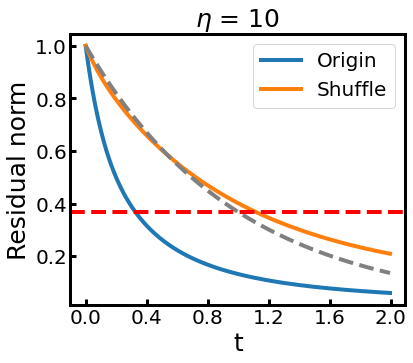

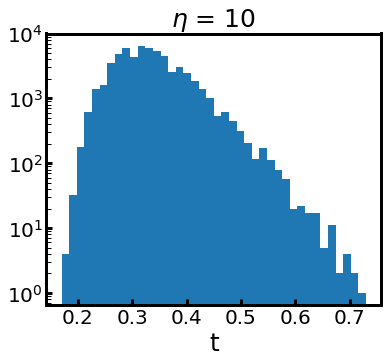

In [21]:
m=1
plt.figure(figsize = (6,5))
p_decay = []
axis = plt.subplot(1,1,1)
for i in range(400):
    p_decay.append(np.exp(-i/200))
    #print(i,p_decay[-1])
plt.plot([i/200 for i in range(400)], [i.mean().cpu() for i in p], label = 'Origin', linewidth = lwidth)
plt.plot([i/200 for i in range(400)], [i.mean().cpu() for i in p_s], label = 'Shuffle', linewidth = lwidth)
#plt.plot([i/200 for i in range(400)], [i.mean().cpu() for i in p_test], label = 'Test')
plt.plot([i/200 for i in range(400)], p_decay, '--',color = 'gray', linewidth = lwidth)
plt.axhline(1/np.e, linestyle='--', color = 'r', linewidth = lwidth)

plt.legend(fontsize = ssize)
axis.xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.4))
plt.xticks(fontsize = ssize)
plt.yticks(fontsize = ssize)
plt.tick_params(which = 'major', direction = 'in', width = 3, length = 6)
plt.tick_params(which = 'minor', direction = 'in', width = 1, length = 5)
ax = plt.gca()
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
ax.spines['top'].set_linewidth(3)
plt.xlabel('t', fontsize = 25)
plt.ylabel(r'Residual norm', fontsize = bsize)
plt.title(r'$\eta$ = '+str(eta_str[m]), fontsize = bsize)
plt.savefig('fig/fig-s4-2-characteristic time.pdf', bbox_inches = 'tight')

plt.figure(figsize = (6,5))
plt.hist(decay_time.cpu().reshape(1,-1), bins =40, density = False)
plt.title('Distribution of characteristic time',fontsize =20)
plt.xlabel('t', fontsize = 25)
plt.semilogy()
plt.xticks(fontsize = ssize)
plt.yticks(fontsize = ssize)
plt.tick_params(which = 'major', direction = 'in', width = 3, length = 6)
plt.tick_params(which = 'minor', direction = 'in', width = 1, length = 5)
ax = plt.gca()
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
ax.spines['top'].set_linewidth(3)
plt.title(r'$\eta$ = '+str(eta_str[m]), fontsize = bsize)
plt.savefig('fig/fig-s5-2-characteristic time.eps', bbox_inches = 'tight')

In [92]:
torch.save([p.copy(), p_s.copy(), p_decay, decay_time, decay_time_s], 'charateristic_time_1_eta=10')

In [4]:
# Decay time of eta = 1

MNIST = torchvision.datasets.MNIST('./data/', train = True, download = True, transform = torchvision.transforms.ToTensor())   
s = [i[0].reshape(784) for i in MNIST]
label = np.array([i[1] for i in MNIST])
s = torch.stack(s).double().cuda()

m = 2

ld, u = torch.linalg.eig( torch.eye(784).cuda() + w[m] )
v = torch.linalg.inv( torch.eye(784).cuda() + w[m] )
x = v.mm( s.t() )

stable = ((s.t())**2).mean(0)

#residual = torch.linalg.inv(u).mm( torch.diag( torch.exp(-ld*0 ))).mm(u).mm(torch.complex(x, torch.zeros(x.shape).cuda().double()))
p = []
decay_time = torch.zeros(60000).cuda()-1
for i in range(400):
    residual = u.mm( torch.diag( torch.exp(-ld*i/200 )) ).mm(torch.linalg.inv(u)).mm(torch.complex(s.t(), torch.zeros(s.t().shape).cuda().double()))
    p.append(torch.sqrt((residual*residual.conj()).mean(0)/stable).real)
    decay_time[(decay_time<0 )*(p[-1] < 1/np.e)] = i/200
    print(i, (decay_time!=-1).sum())



MNIST = torchvision.datasets.MNIST('./data/', train = True, download = True, transform = torchvision.transforms.ToTensor())   
s = [i[0].reshape(784) for i in MNIST]
label = np.array([i[1] for i in MNIST])
s = torch.stack(s).double().cuda()

np.random.seed(0)
n = [i for i in range(784)]
np.random.shuffle(n)
s = s[:, n]

ld, u = torch.linalg.eig( torch.eye(784).cuda() + w[m] )
v = torch.linalg.inv( torch.eye(784).cuda() + w[m] )
x = v.mm(s.t())

stable = ((s.t())**2).mean(0)

#residual = torch.linalg.inv(u).mm( torch.diag( torch.exp(-ld*0 ))).mm(u).mm(torch.complex(x, torch.zeros(x.shape).cuda().double()))
p_s = []
decay_time_s = torch.zeros(60000).cuda()-1
for i in range(400):
    residual = u.mm( torch.diag( torch.exp(-ld*i/200 )) ).mm(torch.linalg.inv(u)).mm(torch.complex(s.t(), torch.zeros(s.t().shape).cuda().double()))
    p_s.append(torch.sqrt((residual*residual.conj()).mean(0)/stable).real)
    decay_time_s[(decay_time_s<0 )*(p_s[-1] < 1/np.e)] = i/200
    print(i, (decay_time_s!=-1).sum())

0 tensor(0, device='cuda:0')
1 tensor(0, device='cuda:0')
2 tensor(0, device='cuda:0')
3 tensor(0, device='cuda:0')
4 tensor(0, device='cuda:0')
5 tensor(0, device='cuda:0')
6 tensor(0, device='cuda:0')
7 tensor(0, device='cuda:0')
8 tensor(0, device='cuda:0')
9 tensor(0, device='cuda:0')
10 tensor(0, device='cuda:0')
11 tensor(0, device='cuda:0')
12 tensor(0, device='cuda:0')
13 tensor(0, device='cuda:0')
14 tensor(0, device='cuda:0')
15 tensor(0, device='cuda:0')
16 tensor(0, device='cuda:0')
17 tensor(0, device='cuda:0')
18 tensor(0, device='cuda:0')
19 tensor(0, device='cuda:0')
20 tensor(0, device='cuda:0')
21 tensor(0, device='cuda:0')
22 tensor(0, device='cuda:0')
23 tensor(0, device='cuda:0')
24 tensor(0, device='cuda:0')
25 tensor(0, device='cuda:0')
26 tensor(0, device='cuda:0')
27 tensor(0, device='cuda:0')
28 tensor(0, device='cuda:0')
29 tensor(1, device='cuda:0')
30 tensor(2, device='cuda:0')
31 tensor(3, device='cuda:0')
32 tensor(6, device='cuda:0')
33 tensor(13, device

242 tensor(60000, device='cuda:0')
243 tensor(60000, device='cuda:0')
244 tensor(60000, device='cuda:0')
245 tensor(60000, device='cuda:0')
246 tensor(60000, device='cuda:0')
247 tensor(60000, device='cuda:0')
248 tensor(60000, device='cuda:0')
249 tensor(60000, device='cuda:0')
250 tensor(60000, device='cuda:0')
251 tensor(60000, device='cuda:0')
252 tensor(60000, device='cuda:0')
253 tensor(60000, device='cuda:0')
254 tensor(60000, device='cuda:0')
255 tensor(60000, device='cuda:0')
256 tensor(60000, device='cuda:0')
257 tensor(60000, device='cuda:0')
258 tensor(60000, device='cuda:0')
259 tensor(60000, device='cuda:0')
260 tensor(60000, device='cuda:0')
261 tensor(60000, device='cuda:0')
262 tensor(60000, device='cuda:0')
263 tensor(60000, device='cuda:0')
264 tensor(60000, device='cuda:0')
265 tensor(60000, device='cuda:0')
266 tensor(60000, device='cuda:0')
267 tensor(60000, device='cuda:0')
268 tensor(60000, device='cuda:0')
269 tensor(60000, device='cuda:0')
270 tensor(60000, de

338 tensor(60000, device='cuda:0')
339 tensor(60000, device='cuda:0')
340 tensor(60000, device='cuda:0')
341 tensor(60000, device='cuda:0')
342 tensor(60000, device='cuda:0')
343 tensor(60000, device='cuda:0')
344 tensor(60000, device='cuda:0')
345 tensor(60000, device='cuda:0')
346 tensor(60000, device='cuda:0')
347 tensor(60000, device='cuda:0')
348 tensor(60000, device='cuda:0')
349 tensor(60000, device='cuda:0')
350 tensor(60000, device='cuda:0')
351 tensor(60000, device='cuda:0')
352 tensor(60000, device='cuda:0')
353 tensor(60000, device='cuda:0')
354 tensor(60000, device='cuda:0')
355 tensor(60000, device='cuda:0')
356 tensor(60000, device='cuda:0')
357 tensor(60000, device='cuda:0')
358 tensor(60000, device='cuda:0')
359 tensor(60000, device='cuda:0')
360 tensor(60000, device='cuda:0')
361 tensor(60000, device='cuda:0')
362 tensor(60000, device='cuda:0')
363 tensor(60000, device='cuda:0')
364 tensor(60000, device='cuda:0')
365 tensor(60000, device='cuda:0')
366 tensor(60000, de

In [22]:
p, p_s, p_decay, decay_time, decay_time_s = torch.load( 'charateristic_time_1_eta=1')

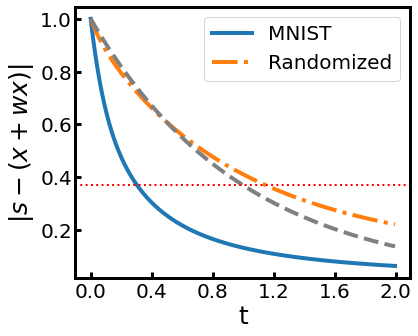

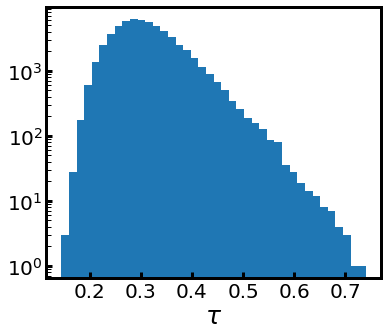

In [23]:
Bbox = mpl.transforms.Bbox([[-0.44,-0.1], [5.7,4.55]])
m=2
plt.figure(figsize = (6,5))
p_decay = []
axis = plt.subplot(1,1,1)
for i in range(400):
    p_decay.append(np.exp(-i/200))
    #print(i,p_decay[-1])
plt.plot([i/200 for i in range(400)], [i.mean().cpu() for i in p], label = 'MNIST', linewidth = lwidth)
plt.plot([i/200 for i in range(400)], [i.mean().cpu() for i in p_s], linestyle='-.', label = 'Randomized', linewidth = lwidth)
#plt.plot([i/200 for i in range(400)], [i.mean().cpu() for i in p_test], label = 'Test')
plt.plot([i/200 for i in range(400)], p_decay, '--',color = 'gray', linewidth = lwidth)
plt.axhline(1/np.e, linestyle=':', color = 'r', linewidth = lwidth/2)

plt.legend(fontsize = ssize)
axis.xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.4))
plt.xticks(fontsize = ssize)
plt.yticks(fontsize = ssize)
plt.tick_params(which = 'major', direction = 'in', width = 3, length = 6)
plt.tick_params(which = 'minor', direction = 'in', width = 1, length = 5)
ax = plt.gca()
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
ax.spines['top'].set_linewidth(3)
plt.xlabel('t', fontsize = 25)
plt.ylabel(r'|${s} - ({x}+{wx})|$', fontsize = bsize)
#plt.title(r'$\eta$ = '+str(eta_str[m]), fontsize = bsize)
plt.savefig('fig/fig-s4-3-characteristic time.pdf', bbox_inches = 'tight' )

plt.figure(figsize = (6,5))
plt.hist(decay_time.cpu().reshape(1,-1), bins =40, density = False)
#plt.title('Distribution of characteristic time',fontsize =20)
plt.xlabel(r'$\tau$', fontsize = 25)
#plt.ylabel(' ', fontsize = bsize)
plt.semilogy()
plt.xticks(fontsize = ssize)
plt.yticks(fontsize = ssize)
plt.tick_params(which = 'major', direction = 'in', width = 3, length = 6)
plt.tick_params(which = 'minor', direction = 'in', width = 1, length = 5)
ax = plt.gca()
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
ax.spines['top'].set_linewidth(3)
#plt.title(r'$\eta$ = '+str(eta_str[m]), fontsize = bsize)
plt.savefig('fig/fig-s5-3-characteristic time.eps', bbox_inches = 'tight' )

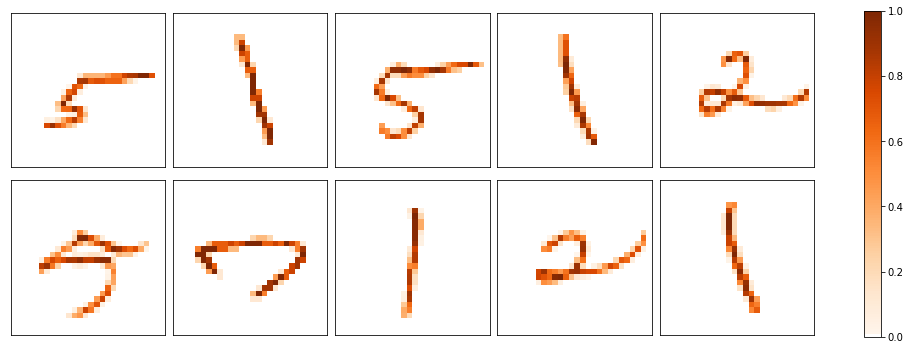

In [24]:
MNIST = torchvision.datasets.MNIST('./data/', train = True, download = True, transform = torchvision.transforms.ToTensor())   
s = [i[0].reshape(784) for i in MNIST]
label = np.array([i[1] for i in MNIST])
s = torch.stack(s).double().cuda()
bottom = mpl.cm.get_cmap('Oranges', 128)
#interval = mpl.cm.get_cmap('White', 1024)
top = mpl.cm.get_cmap('Blues_r', 128)
_, sort_list= torch.sort(decay_time, descending=True)
newcolors = np.vstack(( np.array([1,1,1,1]),
                                       bottom(np.linspace(0, 1, 128))))
newcmp = mpl.colors.ListedColormap(newcolors, name='OrangeBlue')
fig = plt.figure(figsize = (18,6))
ax = []
for i in range(10):
    ax.append(plt.subplot(2,5,i+1))
    a = plt.imshow(s[sort_list[i]].reshape(28,28).cpu(), cmap = newcmp,vmin = 0,vmax = 1)
    plt.xticks([])
    plt.yticks([])

plt.subplots_adjust(wspace = 0.05, hspace = 0.05)
fig.colorbar(a,ax = ax,shrink = 1)
plt.savefig('fig/fig-s6-long time response.eps', bbox_inches = 'tight')

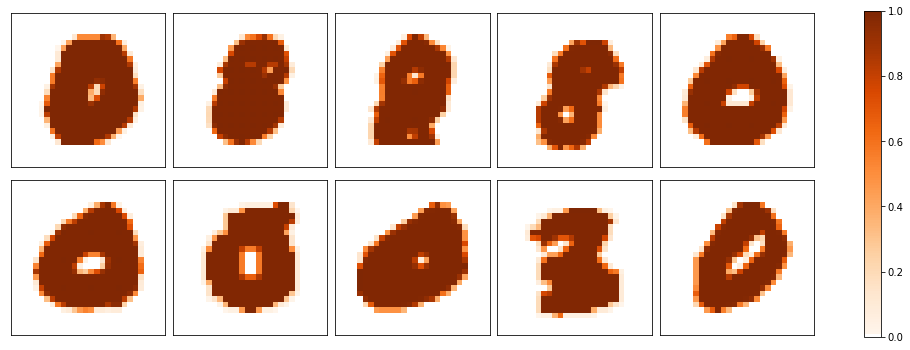

In [25]:
MNIST = torchvision.datasets.MNIST('./data/', train = True, download = True, transform = torchvision.transforms.ToTensor())   
s = [i[0].reshape(784) for i in MNIST]
label = np.array([i[1] for i in MNIST])
s = torch.stack(s).double().cuda()
bottom = mpl.cm.get_cmap('Oranges', 128)
#interval = mpl.cm.get_cmap('White', 1024)
top = mpl.cm.get_cmap('Blues_r', 128)
_, sort_list= torch.sort(decay_time, descending=False)
newcolors = np.vstack(( np.array([1,1,1,1]),
                                       bottom(np.linspace(0, 1, 128))))
newcmp = mpl.colors.ListedColormap(newcolors, name='OrangeBlue')
fig = plt.figure(figsize = (18,6))
ax = []
for i in range(10):
    ax.append(plt.subplot(2,5,i+1))
    a = plt.imshow(s[sort_list[i]].reshape(28,28).cpu(), cmap = newcmp, vmin = 0, vmax = 1)
    plt.xticks([])
    plt.yticks([])

plt.subplots_adjust(wspace = 0.05, hspace = 0.05)
fig.colorbar(a,ax = ax,shrink = 1)
plt.savefig('fig/fig-s6-2-short time response.eps', bbox_inches = 'tight')

In [95]:
torch.save([p.copy(), p_s.copy(), p_decay, decay_time, decay_time_s], 'charateristic_time_1_eta=1')

In [95]:
# Design weights
l = 6
N = 18
h = 0.05
h_prime = h
w = torch.zeros(N,N).double()
for i in range(3):
    for j in range(6):
        n = l*i + j
        #print(n, i,j)
        if i == 0:
            w[n, n+l] = h
            if j == 0:
                w[n,n+1] = h
                w[n,n+1+l] = h_prime
            elif j == l-1:
                w[n,n-1] = h
                w[n,n+l-1] = h_prime
            else:
                w[n,n+1] = h
                w[n,n+l+1] = h_prime
                w[n,n-1] = h
                w[n,n+l-1] = h_prime
        elif i == 2:
            w[n, n-l] = h
            if j == 0:
                w[n,n+1] = h
                w[n,n+1-l] = h_prime
            elif j == l-1:
                w[n,n-1] = h
                w[n,n-1-l] = h_prime
            else:
                w[n,n+1] = h
                w[n,n+1-l] = h_prime
                w[n,n-1] = h
                w[n,n-1-l] = h_prime
        else:
            w[n, n+l] = h
            w[n, n-l] = h
            if j == 0:
                w[n,n+1] = h
                w[n, n+1-l] = h_prime
                w[n,n+1+l] = h_prime
            elif j  == l-1:
                w[n, n-1] = h
                w[n, n-1-l] = h_prime
                w[n, n-1+l] = h_prime
            else:
                w[n,n+1] = h
                w[n, n+1-l] = h_prime
                w[n,n+1+l] = h_prime
                w[n, n-1] = h
                w[n, n-1-l] = h_prime
                w[n, n-1+l] = h_prime

Text(0.5, 1.0, 'Original image')

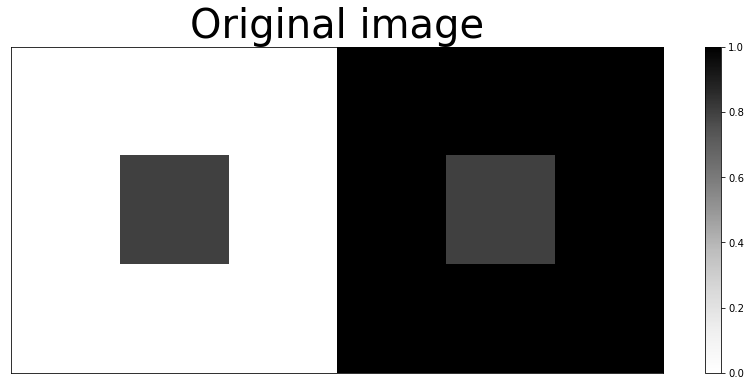

In [96]:
plt.figure(figsize = (15,6))
image1 = torch.ones(3,3).double()*0
image1[1, 1] = 1-0.2
#plt.imshow(image1, cmap = 'gray', vmin = 0, vmax = 1)
image2 = torch.ones(3,3).double()*1
image2[1, 1] = 1-0.2
plt.imshow(torch.hstack((image1,image2)), cmap = 'Greys', vmin = 0, vmax = 1)
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.title('Original image', fontsize = 40)
#plt.savefig('fig/fig-illusion-1.pdf',bbox_inches = 'tight')

In [97]:
torch.linalg.inv(torch.eye(N).cuda()+w.cuda()).cpu().mm(torch.hstack((image1,image2)).reshape(-1,1)).reshape(3,6)

tensor([[-0.0384, -0.0238, -0.1190,  0.9095,  0.8052,  0.8965],
        [-0.0352,  0.8278, -0.1593,  0.8255,  0.4572,  0.8070],
        [-0.0384, -0.0238, -0.1190,  0.9095,  0.8052,  0.8965]],
       dtype=torch.float64)

In [35]:
# Distribution of cosine similarity among images

def distribution_in(s, bins = 100, density = True):
    s_norm = torch.sqrt((s**2).sum(1)).cpu()
    interval = np.arange(0,1,1/bins)
    dis = torch.zeros(bins)
    angle_list = []
    for i in range(s.shape[0]-1):
        angle_list.append(s[i].reshape(1,-1).mm(s[i+1:].t()).cpu()/s_norm[i+1:]/s_norm[i])
        a,b = torch.histogram(angle_list[-1], range = (-1,1), bins = bins)
        dis+=a
        if i %1000 == 0:
            print(i, end = ';;')
    if density:
        dis = dis/dis.sum()*bins
    angle_list = torch.hstack(angle_list)
    mean = angle_list.mean()
    std = angle_list.std()
    angle_list = 0
    return interval, dis, mean, std

def distribution_out(s, s_out, bins = 100, density = True):
    s_norm = torch.sqrt((s**2).sum(1)).cpu()
    s_out_norm = torch.sqrt((s_out**2).sum(1)).cpu()
    interval = np.arange(0,1,1/bins)
    dis = torch.zeros(bins)
    angle_list = []
    for i in range(s.shape[0]):
        angle_list.append((s[i].reshape(1,-1).mm(s_out.t()).cpu()/s_out_norm/s_norm[i]).reshape(1,-1))
        a,b = torch.histogram(angle_list[-1], range = (-1,1), bins = bins)
        dis+=a
        if i %1000 == 0:
            print(i, end = ';;')
    if density:
        dis = dis/dis.sum()*bins
    angle_list = torch.hstack(angle_list)
    mean = (angle_list).mean()
    std = (angle_list).std()
    angle_list = 0
    return interval, dis, mean, std


In [29]:
## distribution of overlap
MNIST = torchvision.datasets.MNIST('./data/', train = True, download = True, transform = torchvision.transforms.ToTensor())   
s = [i[0].reshape(784) for i in MNIST]
label = np.array([i[1] for i in MNIST])
s = torch.stack(s).double().cuda()
x = torch.linalg.inv(w[2]+torch.eye(784).cuda().double()).mm(s.t()).t()
p = w[2].mm(x.t()).t()
dis_in = []
dis_out = []

In [ ]:
_,total_ditribution_s, total_mean_s, total_std_s = distribution_in(s, bins = 200)
_,total_ditribution_p, total_mean_p, total_std_p = distribution_in(p, bins = 200)
_,total_ditribution_x, total_mean_x, total_std_x = distribution_in(x, bins = 200)

0;;1000;;2000;;3000;;4000;;5000;;6000;;7000;;8000;;9000;;10000;;11000;;12000;;13000;;14000;;15000;;16000;;17000;;18000;;19000;;20000;;21000;;22000;;23000;;24000;;25000;;26000;;27000;;28000;;29000;;30000;;31000;;32000;;33000;;34000;;35000;;36000;;37000;;38000;;39000;;40000;;41000;;42000;;43000;;44000;;45000;;46000;;47000;;48000;;49000;;50000;;51000;;52000;;53000;;54000;;55000;;56000;;57000;;58000;;59000;;0;;1000;;2000;;3000;;4000;;5000;;6000;;7000;;8000;;9000;;10000;;11000;;12000;;13000;;14000;;15000;;16000;;17000;;18000;;19000;;20000;;21000;;22000;;23000;;24000;;25000;;26000;;27000;;28000;;29000;;30000;;31000;;32000;;33000;;34000;;35000;;36000;;37000;;38000;;39000;;40000;;41000;;42000;;43000;;44000;;45000;;46000;;47000;;48000;;49000;;50000;;51000;;52000;;53000;;54000;;55000;;56000;;57000;;58000;;59000;;0;;1000;;2000;;3000;;4000;;5000;;6000;;7000;;8000;;9000;;10000;;11000;;12000;;13000;;14000;;15000;;16000;;17000;;18000;;19000;;20000;;21000;;22000;;23000;;

In [ ]:
dis_in_s = []
dis_out_s = []
dis_in_x = []
dis_out_x = []
dis_in_p = []
dis_out_p = []
mean_in_s = []
mean_out_s = []
mean_in_p = []
mean_out_p = []
mean_in_x = []
mean_out_x = []
std_in_s = []
std_out_s = []
std_in_x = []
std_out_x = []
std_in_p = []
std_out_p = []
for i in range(10):
    print(i)
    interval, dis_in, mean_in, std_in = distribution_in(s[label==i], bins = 200)
    interval, dis_out, mean_out, std_out = distribution_out(s[label==i], s[label!=i],bins = 200)
    dis_in_s.append(dis_in)
    dis_out_s.append(dis_out)
    mean_in_s.append(mean_in)
    mean_out_s.append(mean_out)
    std_in_s.append(std_in)
    std_out_s.append(std_out)
    interval, dis_in, mean_in, std_in = distribution_in(p[label==i], bins = 200)
    interval, dis_out, mean_out, std_out = distribution_out(p[label==i], p[label!=i],bins = 200)
    dis_in_p.append(dis_in)
    dis_out_p.append(dis_out)
    mean_in_p.append(mean_in)
    mean_out_p.append(mean_out)
    std_in_p.append(std_in)
    std_out_p.append(std_out)
    interval, dis_in, mean_in, std_in = distribution_in(x[label==i], bins = 200)
    interval, dis_out, mean_out, std_out = distribution_out(x[label==i], x[label!=i],bins = 200)
    dis_in_x.append(dis_in)
    dis_out_x.append(dis_out)
    mean_in_x.append(mean_in)
    mean_out_x.append(mean_out)
    std_in_x.append(std_in)
    std_out_x.append(std_out)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


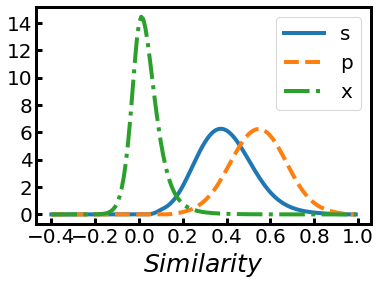

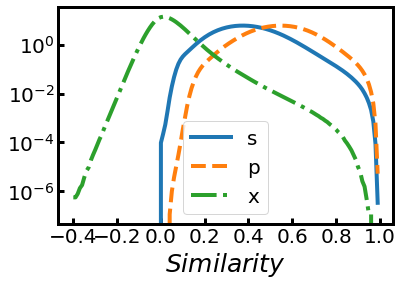

In [39]:
plt.figure(figsize = (6,4))

xticks = 2*(interval)-1

index = 60
plt.plot(xticks[index:], total_ditribution_s[index:], label = 's', linewidth = lwidth)
plt.plot(xticks[index:], total_ditribution_p[index:],'--', label = 'p', linewidth = lwidth)
plt.plot(xticks[index:], total_ditribution_x[index:], '-.',label = 'x', linewidth = lwidth)
#plt.semilogy()
plt.xticks(fontsize = ssize)
plt.yticks(fontsize = ssize)
plt.tick_params(which = 'major', direction = 'in', width = 3, length = 6)
plt.tick_params(which = 'minor', direction = 'in', width = 1, length = 5)
ax = plt.gca()
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
ax.spines['top'].set_linewidth(3)
plt.legend(fontsize = ssize)
plt.xlabel(r'$Similarity$', fontsize = bsize)
#plt.title('distribution of total similarity')
plt.savefig('fig/fig-s10-totalfig.eps',bbox_inches ='tight')

plt.figure(figsize = (6,4))
xticks = 2*(interval)-1
index = 60
plt.plot(xticks[index:], total_ditribution_s[index:], label = 's', linewidth = lwidth)
plt.plot(xticks[index:], total_ditribution_p[index:],'--', label = 'p', linewidth = lwidth)
plt.plot(xticks[index:], total_ditribution_x[index:], '-.',label = 'x', linewidth = lwidth)
plt.semilogy()
plt.xticks(fontsize = ssize)
plt.yticks(fontsize = ssize)
plt.tick_params(which = 'major', direction = 'in', width = 3, length = 6)
plt.tick_params(which = 'minor', direction = 'in', width = 1, length = 5)
ax = plt.gca()
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
ax.spines['top'].set_linewidth(3)
plt.legend(fontsize = ssize)
plt.xlabel(r'$Similarity$', fontsize = bsize)
#plt.title('distribution of total similarity')
plt.savefig('fig/fig-s10-totalfig-log.eps',bbox_inches ='tight')

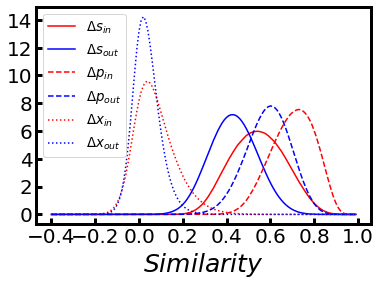

In [42]:
plt.figure(figsize = (6,4))
i = 8
plt.plot(xticks[index:], dis_in_s[i][index:], 'r', label = r'$\Delta s_{in}$')
plt.plot(xticks[index:], dis_out_s[i][index:], 'b', label = r'$\Delta s_{out}$')
plt.plot(xticks[index:], dis_in_p[i][index:], 'r--', label = r'$\Delta p_{in}$')
plt.plot(xticks[index:], dis_out_p[i][index:], 'b--', label = r'$\Delta p_{out}$')
plt.plot(xticks[index:], dis_in_x[i][index:], 'r:', label = r'$\Delta x_{in}$')
plt.plot(xticks[index:], dis_out_x[i][index:], 'b:', label = r'$\Delta x_{out}$')
plt.xticks(fontsize = ssize)
plt.yticks(fontsize = ssize)
plt.tick_params(which = 'major', direction = 'in', width = 3, length = 6)
plt.tick_params(which = 'minor', direction = 'in', width = 1, length = 5)
ax = plt.gca()
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
ax.spines['top'].set_linewidth(3)
plt.legend(fontsize = ssize*2/3)
plt.xlabel(r'$Similarity$', fontsize = bsize)
plt.savefig('fig/fig-s10-classfig.pdf',bbox_inches ='tight')

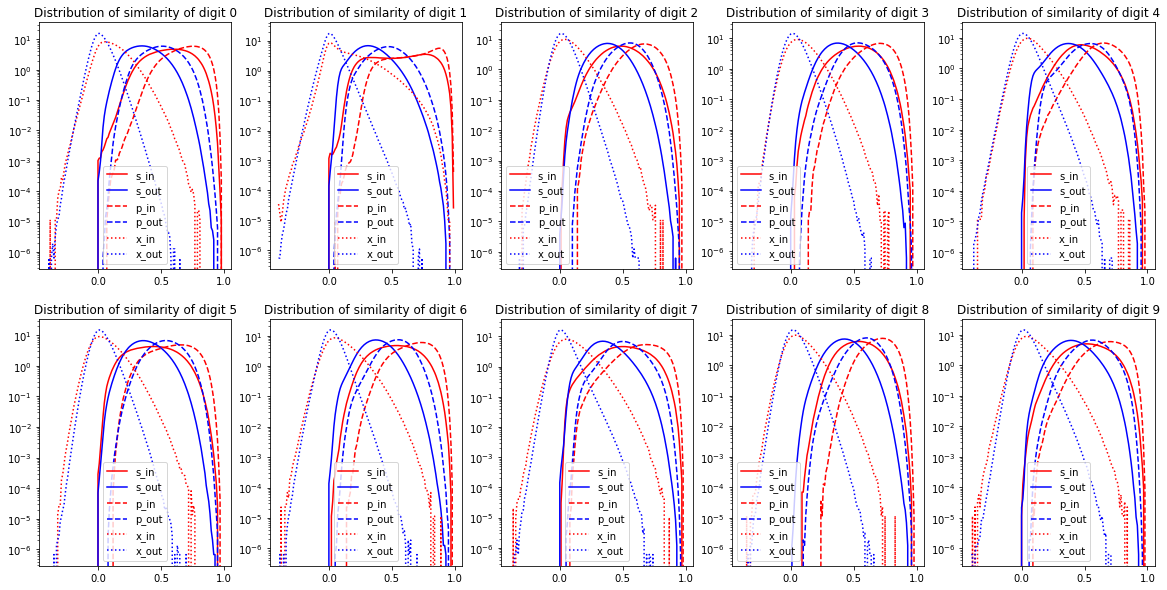

In [43]:
plt.figure(figsize = (20,10))

for i in range(10):
    plt.subplot(2,5, i+1)
    plt.plot(xticks[index:], dis_in_s[i][index:], 'r', label = 's_in')
    plt.plot(xticks[index:], dis_out_s[i][index:], 'b', label = 's_out')
    plt.plot(xticks[index:], dis_in_p[i][index:], 'r--', label = 'p_in')
    plt.plot(xticks[index:], dis_out_p[i][index:], 'b--', label = 'p_out')
    plt.plot(xticks[index:], dis_in_x[i][index:], 'r:', label = 'x_in')
    plt.plot(xticks[index:], dis_out_x[i][index:], 'b:', label = 'x_out')
    plt.semilogy()
    plt.title('Distribution of similarity of digit '+str(i))
    plt.legend()
plt.savefig('fig/fig-s10-digitfig.pdf')

In [26]:
torch.save([total_ditribution_s, total_mean_s, total_std_s, total_ditribution_p, total_mean_p, total_std_p, total_ditribution_x, total_mean_x, total_std_x], 'total similarity of patterns')
torch.save([dis_in_s,  dis_out_s, dis_in_p, dis_out_p, dis_in_x, dis_out_x], 'similarity among class')

In [41]:
total_ditribution_s, total_mean_s, total_std_s, total_ditribution_p, total_mean_p, total_std_p, total_ditribution_x, total_mean_x, total_std_x = torch.load('total similarity of patterns')
dis_in_s,  dis_out_s, dis_in_p, dis_out_p, dis_in_x, dis_out_x = torch.load('similarity among class')

In [42]:
## distribution of oresidual similarity
MNIST = torchvision.datasets.MNIST('./data/', train = True, download = True, transform = torchvision.transforms.ToTensor())   
s = [i[0].reshape(784) for i in MNIST]
label = np.array([i[1] for i in MNIST])
s = torch.stack(s).double().cuda()
x = torch.linalg.inv(w[2]+torch.eye(784).cuda().double()).mm(s.t()).t()
p = w[2].mm(x.t()).t()
dis_in = []
dis_out = []


s = s - s.mean(0)
x = x - x.mean(0)
p = p - p.mean(0)

In [43]:
_,total_ditribution_s, total_mean_s, total_std_s = distribution_in(s, bins = 200)
_,total_ditribution_p, total_mean_p, total_std_p = distribution_in(p, bins = 200)
_,total_ditribution_x, total_mean_x, total_std_x = distribution_in(x, bins = 200)

0;;1000;;2000;;3000;;4000;;5000;;6000;;7000;;8000;;9000;;10000;;11000;;12000;;13000;;14000;;15000;;16000;;17000;;18000;;19000;;20000;;21000;;22000;;23000;;24000;;25000;;26000;;27000;;28000;;29000;;30000;;31000;;32000;;33000;;34000;;35000;;36000;;37000;;38000;;39000;;40000;;41000;;42000;;43000;;44000;;45000;;46000;;47000;;48000;;49000;;50000;;51000;;52000;;53000;;54000;;55000;;56000;;57000;;58000;;59000;;0;;1000;;2000;;3000;;4000;;5000;;6000;;7000;;8000;;9000;;10000;;11000;;12000;;13000;;14000;;15000;;16000;;17000;;18000;;19000;;20000;;21000;;22000;;23000;;24000;;25000;;26000;;27000;;28000;;29000;;30000;;31000;;32000;;33000;;34000;;35000;;36000;;37000;;38000;;39000;;40000;;41000;;42000;;43000;;44000;;45000;;46000;;47000;;48000;;49000;;50000;;51000;;52000;;53000;;54000;;55000;;56000;;57000;;58000;;59000;;0;;1000;;2000;;3000;;4000;;5000;;6000;;7000;;8000;;9000;;10000;;11000;;12000;;13000;;14000;;15000;;16000;;17000;;18000;;19000;;20000;;21000;;22000;;23000;;24000;;25000;;26000;;27000;;280

In [44]:
dis_in_s = []
dis_out_s = []
dis_in_x = []
dis_out_x = []
dis_in_p = []
dis_out_p = []
mean_in_s = []
mean_out_s = []
mean_in_p = []
mean_out_p = []
mean_in_x = []
mean_out_x = []
std_in_s = []
std_out_s = []
std_in_x = []
std_out_x = []
std_in_p = []
std_out_p = []
for i in range(10):
    print(i)
    interval, dis_in, mean_in, std_in = distribution_in(s[label==i], bins = 200)
    interval, dis_out, mean_out, std_out = distribution_out(s[label==i], s[label!=i],bins = 200)
    dis_in_s.append(dis_in)
    dis_out_s.append(dis_out)
    mean_in_s.append(mean_in)
    mean_out_s.append(mean_out)
    std_in_s.append(std_in)
    std_out_s.append(std_out)
    interval, dis_in, mean_in, std_in = distribution_in(p[label==i], bins = 200)
    interval, dis_out, mean_out, std_out = distribution_out(p[label==i], p[label!=i],bins = 200)
    dis_in_p.append(dis_in)
    dis_out_p.append(dis_out)
    mean_in_p.append(mean_in)
    mean_out_p.append(mean_out)
    std_in_p.append(std_in)
    std_out_p.append(std_out)
    interval, dis_in, mean_in, std_in = distribution_in(x[label==i], bins = 200)
    interval, dis_out, mean_out, std_out = distribution_out(x[label==i], x[label!=i],bins = 200)
    dis_in_x.append(dis_in)
    dis_out_x.append(dis_out)
    mean_in_x.append(mean_in)
    mean_out_x.append(mean_out)
    std_in_x.append(std_in)
    std_out_x.append(std_out)

0
0;;1000;;2000;;3000;;4000;;5000;;0;;1000;;2000;;3000;;4000;;5000;;0;;1000;;2000;;3000;;4000;;5000;;0;;1000;;2000;;3000;;4000;;5000;;0;;1000;;2000;;3000;;4000;;5000;;0;;1000;;2000;;3000;;4000;;5000;;1
0;;1000;;2000;;3000;;4000;;5000;;6000;;0;;1000;;2000;;3000;;4000;;5000;;6000;;0;;1000;;2000;;3000;;4000;;5000;;6000;;0;;1000;;2000;;3000;;4000;;5000;;6000;;0;;1000;;2000;;3000;;4000;;5000;;6000;;0;;1000;;2000;;3000;;4000;;5000;;6000;;2
0;;1000;;2000;;3000;;4000;;5000;;0;;1000;;2000;;3000;;4000;;5000;;0;;1000;;2000;;3000;;4000;;5000;;0;;1000;;2000;;3000;;4000;;5000;;0;;1000;;2000;;3000;;4000;;5000;;0;;1000;;2000;;3000;;4000;;5000;;3
0;;1000;;2000;;3000;;4000;;5000;;6000;;0;;1000;;2000;;3000;;4000;;5000;;6000;;0;;1000;;2000;;3000;;4000;;5000;;6000;;0;;1000;;2000;;3000;;4000;;5000;;6000;;0;;1000;;2000;;3000;;4000;;5000;;6000;;0;;1000;;2000;;3000;;4000;;5000;;6000;;4
0;;1000;;2000;;3000;;4000;;5000;;0;;1000;;2000;;3000;;4000;;5000;;0;;1000;;2000;;3000;;4000;;5000;;0;;1000;;2000;;3000;;4000;;

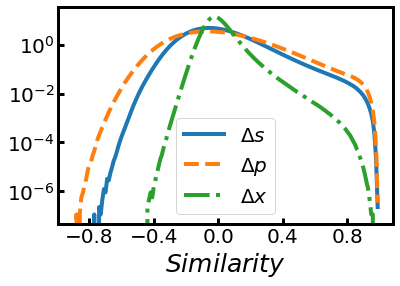

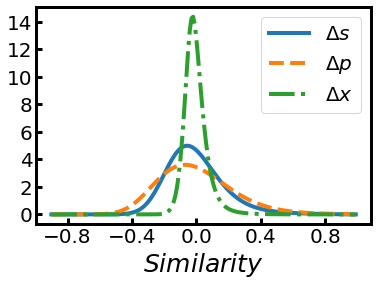

In [45]:
plt.figure(figsize = (6,4))
axis = plt.subplot(111)
xticks = 2*(interval)-1
index = 10
plt.plot(xticks[index:], total_ditribution_s[index:], label = r'$\Delta s$', linewidth = lwidth)
plt.plot(xticks[index:], total_ditribution_p[index:],'--', label = r'$\Delta p$', linewidth = lwidth)
plt.plot(xticks[index:], total_ditribution_x[index:], '-.',label = r'$\Delta x$', linewidth = lwidth)
plt.semilogy()
plt.xticks(fontsize = ssize)
plt.yticks(fontsize = ssize)
plt.tick_params(which = 'major', direction = 'in', width = 3, length = 6)
plt.tick_params(which = 'minor', direction = 'in', width = 1, length = 5)
axis.xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.4))
ax = plt.gca()
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
ax.spines['top'].set_linewidth(3)
plt.legend(fontsize = ssize)
plt.xlabel(r'$Similarity$', fontsize = bsize)
plt.savefig('fig/fig-s11-totalfig-log.pdf',bbox_inches ='tight')


plt.figure(figsize = (6,4))
axis = plt.subplot(111)
xticks = 2*(interval)-1
index = 10
plt.plot(xticks[index:], total_ditribution_s[index:], label = r'$\Delta s$', linewidth = lwidth)
plt.plot(xticks[index:], total_ditribution_p[index:],'--', label = r'$\Delta p$', linewidth = lwidth)
plt.plot(xticks[index:], total_ditribution_x[index:], '-.',label = r'$\Delta x$', linewidth = lwidth)
#plt.semilogy()
plt.xticks(fontsize = ssize)
plt.yticks(fontsize = ssize)
plt.tick_params(which = 'major', direction = 'in', width = 3, length = 6)
plt.tick_params(which = 'minor', direction = 'in', width = 1, length = 5)
axis.xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.4))
ax = plt.gca()
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
ax.spines['top'].set_linewidth(3)

plt.legend(fontsize = ssize)
plt.xlabel(r'$Similarity$', fontsize = bsize)
plt.savefig('fig/fig-s11-totalfig.pdf',bbox_inches ='tight')

In [50]:
torch.save([total_ditribution_s, total_mean_s, total_std_s, total_ditribution_p, total_mean_p, total_std_p, total_ditribution_x, total_mean_x, total_std_x], 'total similarity of patterns delta')
torch.save([dis_in_s,  dis_out_s, dis_in_p, dis_out_p, dis_in_x, dis_out_x], 'similarity among class delta')

In [44]:
total_ditribution_s, total_mean_s, total_std_s, total_ditribution_p, total_mean_p, total_std_p, total_ditribution_x, total_mean_x, total_std_x= \
torch.load('total similarity of patterns delta')
dis_in_s,  dis_out_s, dis_in_p, dis_out_p, dis_in_x, dis_out_x = torch.load('similarity among class delta')